
A Análise de Personalidade do Cliente envolve um exame detalhado dos perfis ideais de clientes de uma empresa. Essa análise facilita uma compreensão mais profunda dos clientes, permitindo que as empresas ajustem seus produtos para atender às necessidades, comportamentos e preocupações distintas de diferentes tipos de clientes.  

Ao realizar uma Análise de Personalidade do Cliente, as empresas podem aprimorar seus produtos com base nas preferências de segmentos específicos de clientes. Em vez de alocar recursos para comercializar um novo produto para toda a base de clientes, as empresas podem identificar os segmentos mais propensos a se interessar pelo produto. Assim, os esforços de marketing direcionados podem ser voltados para esses segmentos específicos, otimizando a utilização de recursos e aumentando a probabilidade de sucesso na adoção do produto.  

Detalhes das Features:  
Id: Identificador único para cada indivíduo no conjunto de dados.  
Year_Birth: O ano de nascimento do indivíduo.  
Education: O nível mais alto de educação alcançado pelo indivíduo.  
Marital_Status: O estado civil do indivíduo.  
Income: A renda anual do indivíduo.  
Kidhome: O número de crianças pequenas na residência.  
Teenhome: O número de adolescentes na residência.  
Dt_Customer: A data em que o cliente foi cadastrado ou passou a fazer parte da base de dados da empresa.  
Recency: O número de dias desde a última compra ou interação.  
MntWines: O valor gasto em vinhos.  
MntFruits: O valor gasto em frutas.  
MntMeatProducts: O valor gasto em produtos de carne.  
MntFishProducts: O valor gasto em produtos de peixe.  
MntSweetProducts: O valor gasto em produtos doces.  
MntGoldProds: O valor gasto em produtos de ouro.  
NumDealsPurchases: O número de compras feitas com desconto ou como parte de uma promoção.  
NumWebPurchases: O número de compras realizadas no site da empresa.  
NumCatalogPurchases: O número de compras realizadas por meio de catálogos.  
NumStorePurchases: O número de compras realizadas em lojas físicas.  
NumWebVisitsMonth: O número de visitas ao site da empresa em um mês.  
AcceptedCmp3: Indicador binário (1 ou 0) se o indivíduo aceitou a terceira campanha de marketing.  
AcceptedCmp4: Indicador binário (1 ou 0) se o indivíduo aceitou a quarta campanha de marketing.  
AcceptedCmp5: Indicador binário (1 ou 0) se o indivíduo aceitou a quinta campanha de marketing.  
AcceptedCmp1: Indicador binário (1 ou 0) se o indivíduo aceitou a primeira campanha de marketing.  
AcceptedCmp2: Indicador binário (1 ou 0) se o indivíduo aceitou a segunda campanha de marketing.  
Complain: Indicador binário (1 ou 0) se o indivíduo fez uma reclamação.  
Z_CostContact: Um custo constante associado ao contato com o cliente.  
Z_Revenue: Uma receita constante associada a uma resposta bem-sucedida à campanha.  
Response: Indicador binário (1 ou 0) se o indivíduo respondeu à campanha de marketing.  

# Importações, extração e carregamentos

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vishakhdapat_customer_segmentation_clustering_path = kagglehub.dataset_download('vishakhdapat/customer-segmentation-clustering')

print('Data source import complete.')

100%|██████████| 62.0k/62.0k [00:00<00:00, 26.9MB/s]

Extracting files...
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os

In [ ]:
#Definindo o caminho do arquivo
caminho_arquivo = os.path.join(vishakhdapat_customer_segmentation_clustering_path, 'customer_segmentation.csv')


df = pd.read_csv(caminho_arquivo)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Tratamentos e limpeza

In [ ]:
#tratando os dados ausentes NaN

imputer = SimpleImputer(strategy='median')

df[['Income']] = imputer.fit_transform(df[['Income']])

#Analise de dados Exploratória

## Visão macro dos dados

In [ ]:
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   
5  09-09-2013       16       520  ...                  6             0   
6  13-11-2012       34       235  ...                  6             0   
7  08-05-2013       32        76  ...                  8             0   
8  06-06-2013       19        14  ...                  9             0   
9  13-03-2014       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [ ]:
df.tail(10)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2230   7004        1984  Graduation         Single   11012.0        1   
2231   9817        1970      Master         Single   44802.0        0   
2232   8080        1986  Graduation         Single   26816.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   
2234   8372        1974  Graduation        Married   34421.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2238   8235        1956      Master       Together   69245.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2230         0  16-03-2013       82        24  ...                  9   
2231         0  21-08-2012       71       853  ...                  8   
2232         0  17-08-2012       50         5  ...                  4   
2233         0  02-06-2013       23         9  ...                  6   
2234         0  01-07-2013       81         3  ...                  7   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2230             1             0             0             0             0   
2231             0             0             0             0             0   
2232             0             0             0             0             0   
2233             0             0             0             0             0   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2230         0              3         11         0  
2231         0              3         11         0  
2232         0              3         11         0  
2233         0              3         11         0  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[10 rows x 29 columns]

In [ ]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Iterar sobre as colunas do dataframe e imprimir os valores únicos
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos da coluna {column}:')
    print(unique_values)
    print('\n')


Valores únicos da coluna ID:
[5524 2174 4141 ... 7270 8235 9405]


Valores únicos da coluna Year_Birth:
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]


Valores únicos da coluna Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Valores únicos da coluna Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Valores únicos da coluna Income:
[58138. 46344. 71613. ... 56981. 69245. 52869.]


Valores únicos da coluna Kidhome:
[0 1 2]


Valores únicos da coluna Teenhome:
[0 1 2]


Valores únicos da coluna Dt_Customer:
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12

## Aceite das campanhas x outras Features

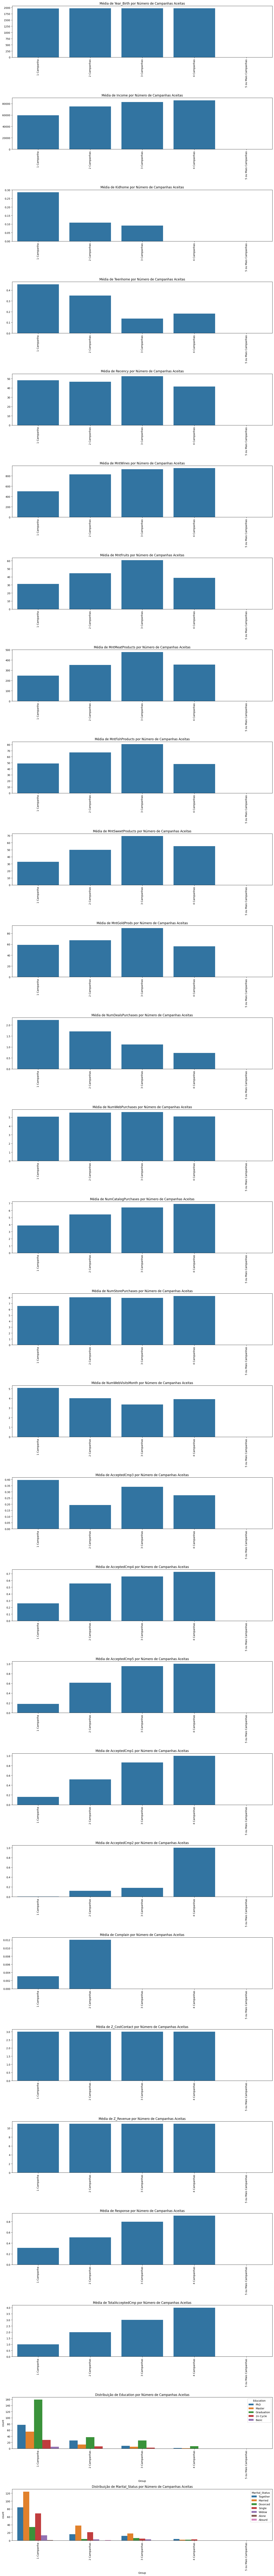

In [ ]:
# Contar o número de campanhas aceitas por cada cliente
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Filtrar clientes por número de campanhas aceitas
accepted_1 = df[df['TotalAcceptedCmp'] == 1]
accepted_2 = df[df['TotalAcceptedCmp'] == 2]
accepted_3 = df[df['TotalAcceptedCmp'] == 3]
accepted_4 = df[df['TotalAcceptedCmp'] == 4]
accepted_5 = df[df['TotalAcceptedCmp'] >= 5]

# Lista de colunas numéricas e categóricas para plotar
numeric_columns = df.select_dtypes(include=[np.number]).drop(columns=['ID']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).drop(columns=['Dt_Customer']).columns.tolist()

# Criar gráficos de barras para comparar os perfis médios dos clientes
fig, axes = plt.subplots(len(numeric_columns) + len(categorical_columns), 1, figsize=(15, 5 * (len(numeric_columns) + len(categorical_columns))))

# Plotar colunas numéricas
for i, col in enumerate(numeric_columns):
    sns.barplot(ax=axes[i], x=['1 Campanha', '2 Campanhas', '3 Campanhas', '4 Campanhas', '5 ou Mais Campanhas'],
                y=[accepted_1[col].mean(), accepted_2[col].mean(), accepted_3[col].mean(), accepted_4[col].mean(), accepted_5[col].mean()])
    axes[i].set_title(f'Média de {col} por Número de Campanhas Aceitas')
    axes[i].tick_params(axis='x', rotation=90)

# Plotar colunas categóricas
for j, col in enumerate(categorical_columns):
    data = pd.concat([accepted_1, accepted_2, accepted_3, accepted_4, accepted_5])
    data['Group'] = ['1 Campanha'] * len(accepted_1) + ['2 Campanhas'] * len(accepted_2) + ['3 Campanhas'] * len(accepted_3) + ['4 Campanhas'] * len(accepted_4) + ['5 ou Mais Campanhas'] * len(accepted_5)
    sns.countplot(ax=axes[len(numeric_columns) + j], x='Group', hue=col, data=data, order=['1 Campanha', '2 Campanhas', '3 Campanhas', '4 Campanhas', '5 ou Mais Campanhas'])
    axes[len(numeric_columns) + j].set_title(f'Distribuição de {col} por Número de Campanhas Aceitas')
    axes[len(numeric_columns) + j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##1- Histograma da idade dos clientes

In [ ]:
# Criar uma lista com os anos a serem removidos
anos_para_remover = [1893, 1899, 1900]

# Filtrar o DataFrame para excluir as linhas com esses anos em 'Year_Birth'
df = df[~df['Year_Birth'].isin(anos_para_remover)]

# Verificar o resultado (opcional)
print(df['Year_Birth'].unique())

[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1990 1947 1993 1994 1941 1944 1995 1940]


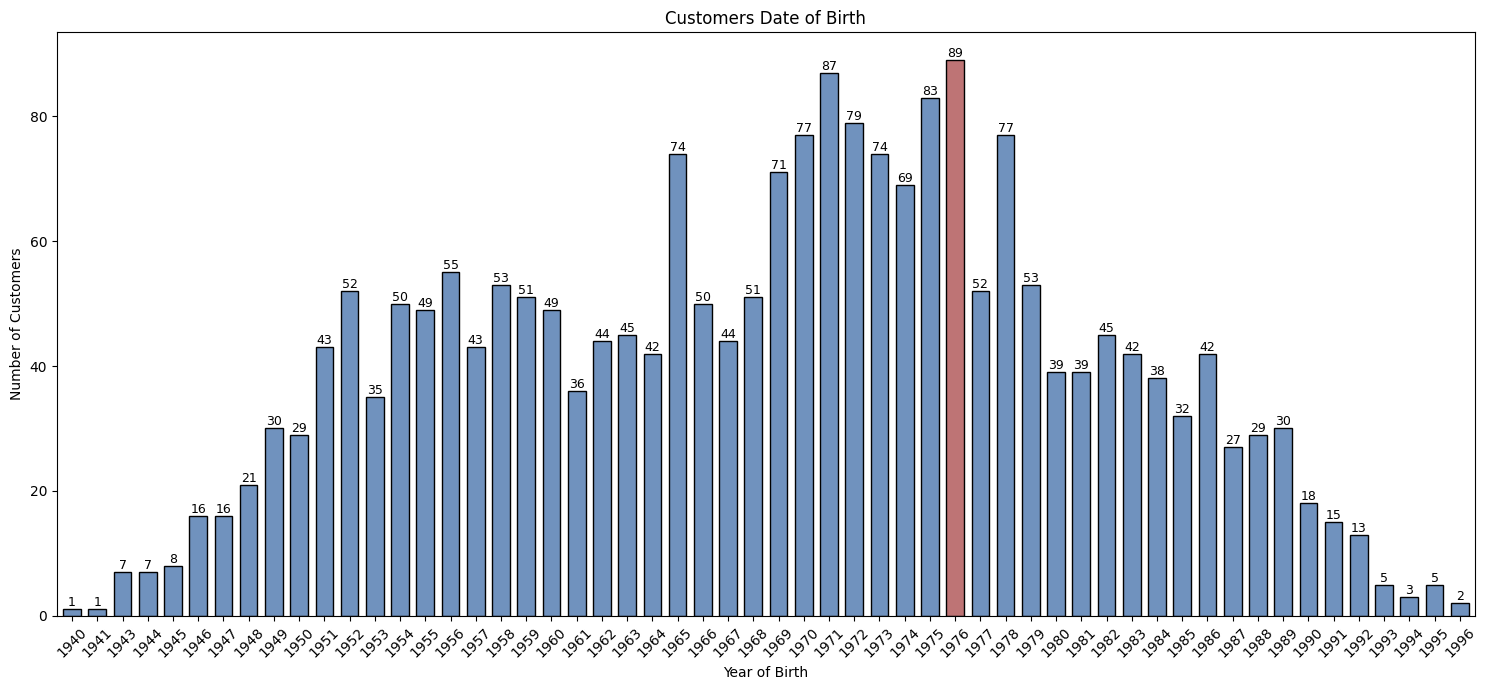

In [ ]:
import matplotlib.pyplot as plt


# Contagem de valores no Year_Birth e ordenação dos índices
x = df['Year_Birth'].value_counts().sort_index()


max_year = x.idxmax()  # Ano com o maior número de clientes
colors = ['#7092BE' if year != max_year else '#BE7475' for year in x.index]

# Criar o gráfico de barras
plt.figure(figsize=(15, 7))
graph = x.plot(
    kind='bar',
    color=colors,  # Aplicando a lista de cores
    edgecolor='black',
    width=0.7,
    title='Customers Date of Birth'
)

# Exibir os valores em cada barra
for p in graph.patches:
    graph.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Ajustes visuais
plt.xlabel('Year of Birth')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Inclina os anos no eixo x
plt.tight_layout()
plt.show()



Podemos ver que a idade dos clientes se concentram entre 46 a 59 anos.



In [ ]:
df['Year_Birth'].describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

##2. Educação

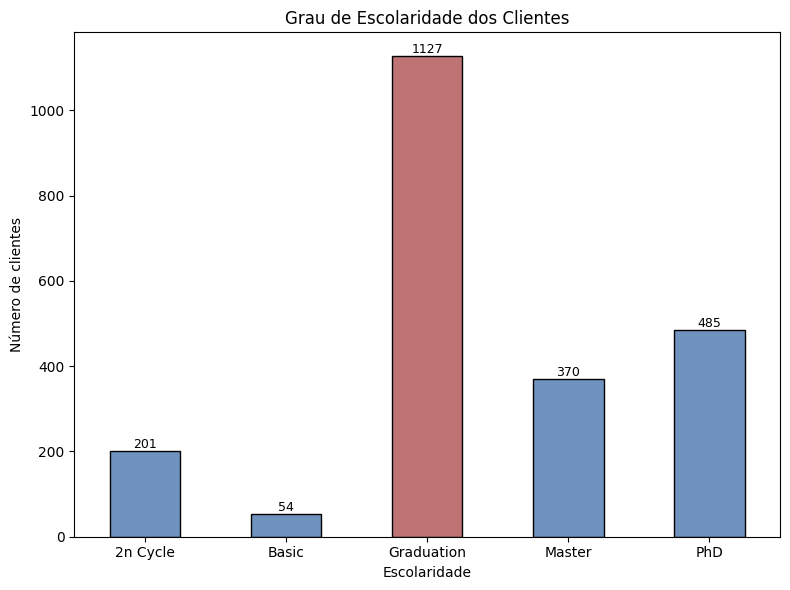

In [ ]:
import matplotlib.pyplot as plt

# Contagem de valores na coluna Education e ordenação alfabética
x = df['Education'].value_counts().sort_index()

# Identificar a categoria com o maior número de clientes
max_education = x.idxmax()
colors = ['#7092BE' if education != max_education else '#BE7475' for education in x.index]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
graph = x.plot(
    kind='bar',
    color=colors,  # Aplicar as cores condicionais
    edgecolor='black',
    title='Grau de Escolaridade dos Clientes'
)

# Exibir os valores em cada barra
for p in graph.patches:
    graph.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Ajustes visuais
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X na horizontal
plt.xlabel('Escolaridade')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()


.

##3. Estado Civil

In [ ]:
#apagar absurd, yolo e alone
df = df[df['Marital_Status'] != 'YOLO']
df = df[df['Marital_Status'] != 'Alone']
df = df[df['Marital_Status'] != 'Absurd']

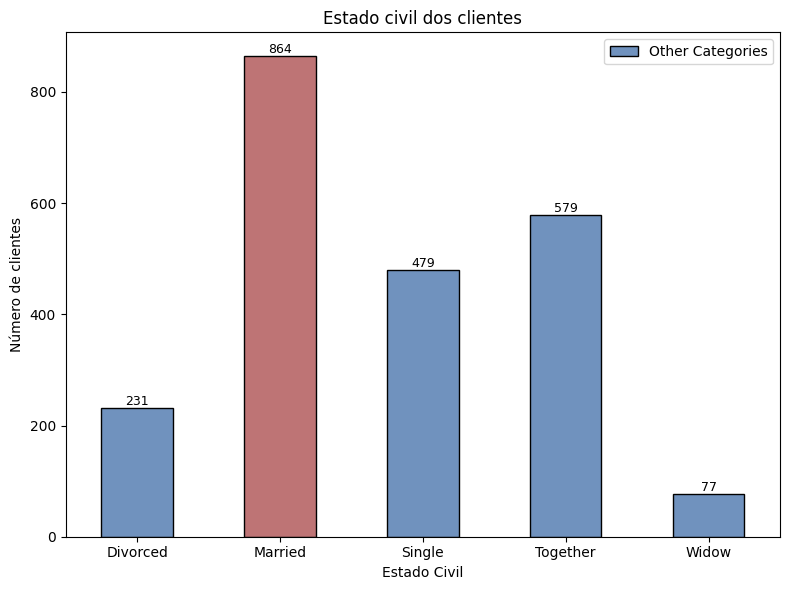

In [ ]:

# Contagem de valores na coluna Marital_Status e ordenação alfabética
x = df['Marital_Status'].value_counts().sort_index()

# Identificar a categoria com o maior número de clientes
max_Marital_Status = x.idxmax()
colors = ['#7092BE' if Marital_Status != max_Marital_Status else '#BE7475' for Marital_Status in x.index]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
graph = x.plot(
    kind='bar',
    color=colors,  # Aplicar as cores condicionais
    edgecolor='black',
    title='Estado civil dos clientes'
)

# Exibir os valores em cada barra
for p in graph.patches:
    graph.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Adicionar legenda para as cores
plt.legend(['Other Categories', 'Max Category'], loc='upper right')

# Ajustes visuais
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X na horizontal
plt.xlabel('Estado Civil')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()




```
# Isto está formatado como código
```

##4. Renda dos clientes

Resumo Estatístico de Income:

          Statistics
count    2230.000000
mean    52224.102691
std     25068.146234
min      1730.000000
25%     35461.500000
50%     51381.500000
75%     68307.250000
max    666666.000000


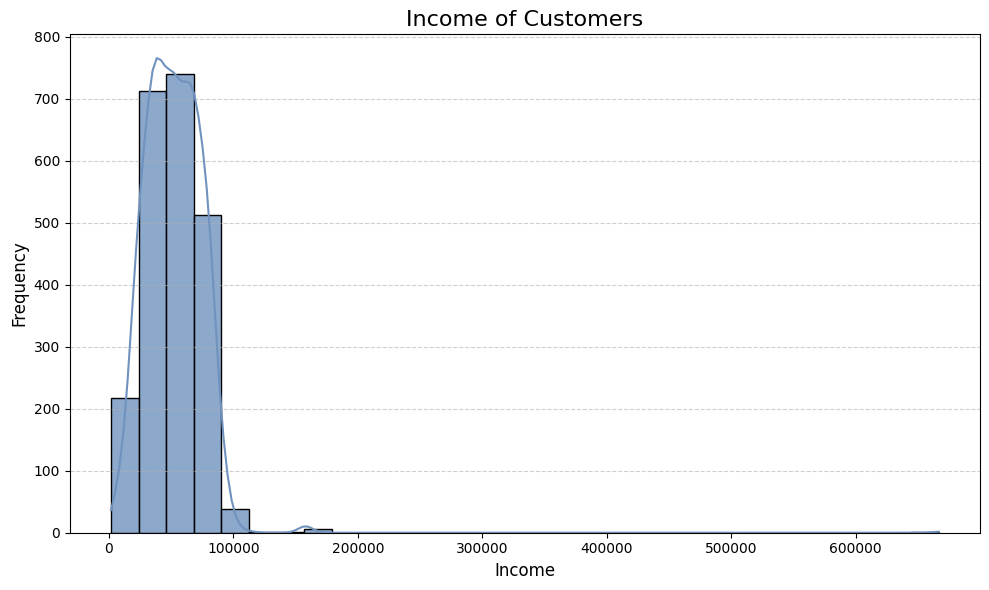

In [ ]:


# Dados da coluna Income
x = df['Income']

plt.figure(figsize=(10, 6))
col = '#7092BE'
sns.histplot(x, kde=True, color=col, edgecolor='black', bins=30, alpha=0.8)
plt.title('Income of Customers', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir resumo estatístico
income_stats = pd.DataFrame(x.describe()).rename(columns={'Income': 'Statistics'})
print("Resumo Estatístico de Income:\n")
print(income_stats)

# Mostrar o gráfico
plt.show()


In [ ]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

Resumo Estatístico de Income:

          Statistics
count    2222.000000
mean    51614.272277
std     20615.942812
min      1730.000000
25%     35395.000000
50%     51381.500000
75%     68118.000000
max    113734.000000


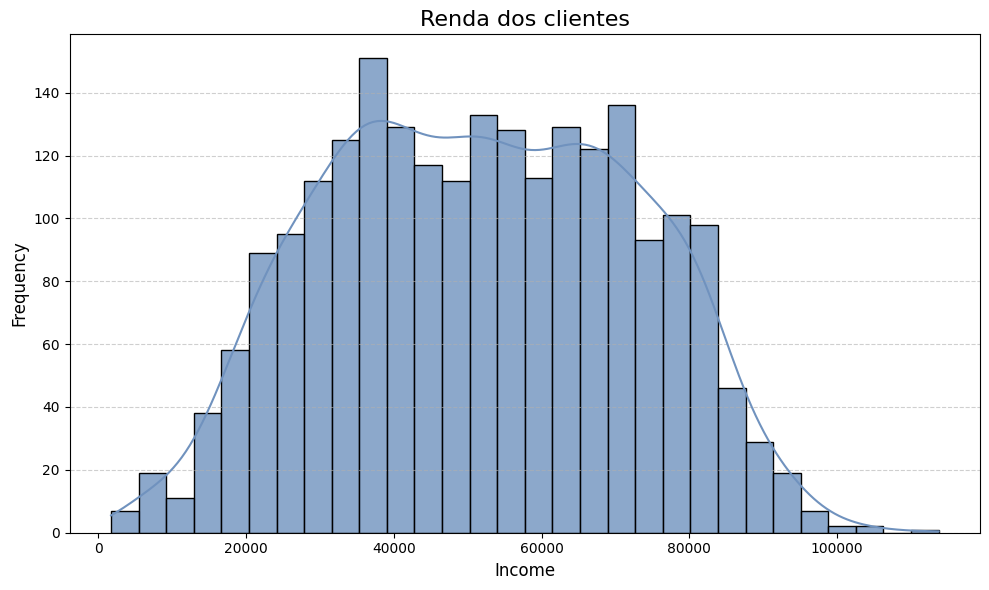

In [ ]:
# Dados da coluna Income
x = df['Income']

plt.figure(figsize=(10, 6))
col = '#7092BE'
sns.histplot(x, kde=True, color=col, edgecolor='black', bins=30, alpha=0.8)
plt.title('Renda dos clientes', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir resumo estatístico
income_stats = pd.DataFrame(x.describe()).rename(columns={'Income': 'Statistics'})
print("Resumo Estatístico de Income:\n")
print(income_stats)

# Mostrar o gráfico
plt.show()

##6. Data de cadastro do cliente

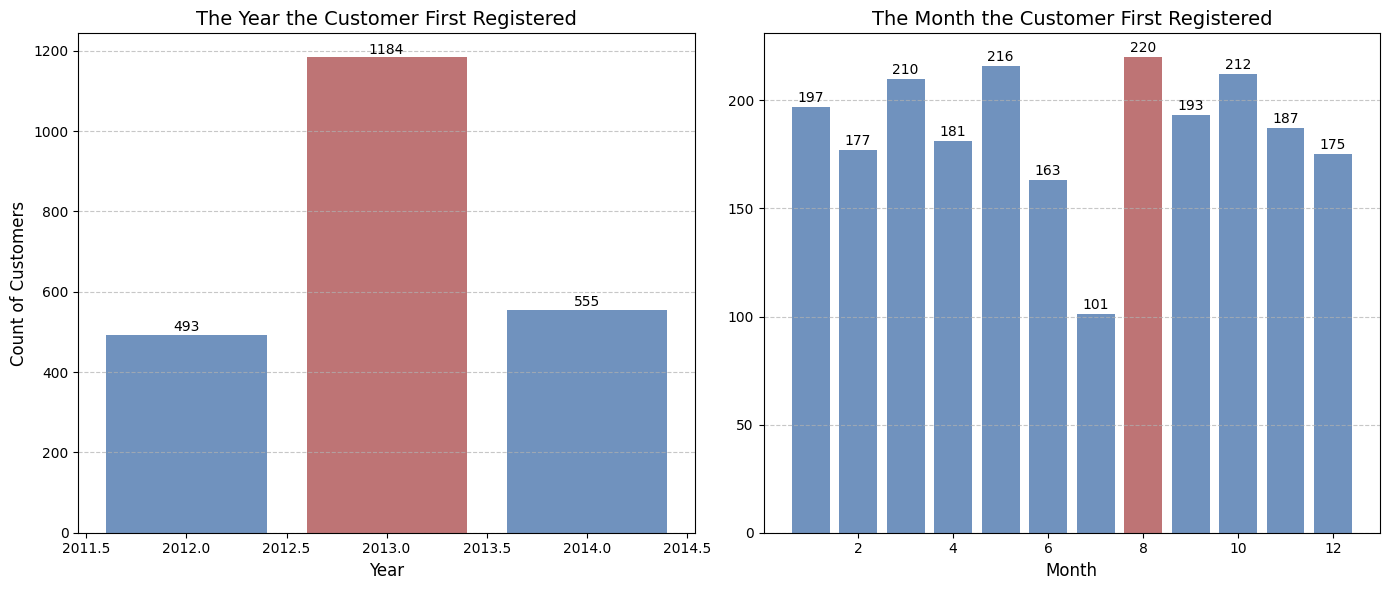

In [ ]:
import matplotlib.pyplot as plt

# Contagem de valores para 'Dt_year' e 'Dt_month'
year = df['Dt_year'].value_counts().sort_index()
month = df['Dt_month'].value_counts().sort_index()

# Configuração das cores
max_color = '#BE7475'
min_color = '#7092BE'

# Criar os subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Gráfico 1: Ano de registro
axes[0].bar(year.index, year.values, color=[max_color if val == year.max() else min_color for val in year.values])
axes[0].set_title('The Year the Customer First Registered', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Count of Customers', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(year.values):
    axes[0].text(year.index[i], v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Gráfico 2: Mês de registro
axes[1].bar(month.index, month.values, color=[max_color if val == month.max() else min_color for val in month.values])
axes[1].set_title('The Month the Customer First Registered', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(month.values):
    axes[1].text(month.index[i], v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar layout
plt.tight_layout()
plt.show()


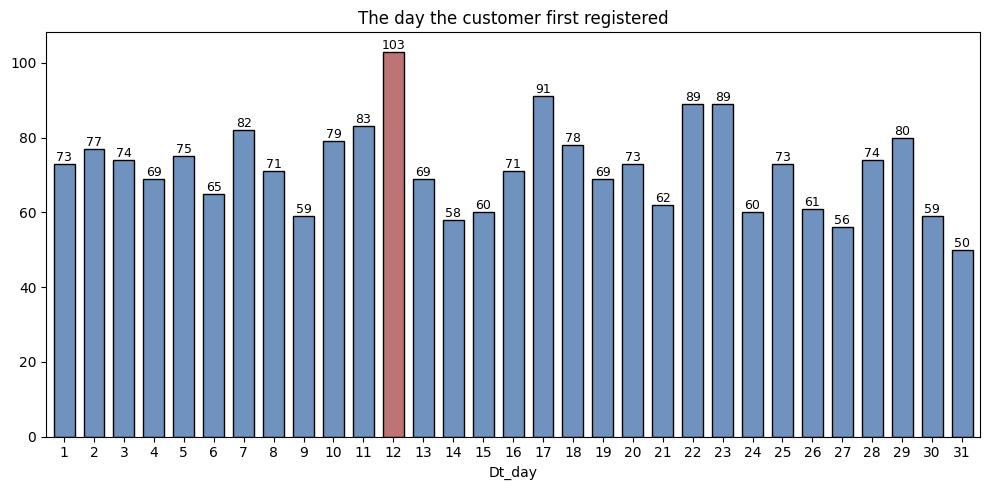

In [ ]:

# Contagem de valores da coluna 'Dt_day'
day = df['Dt_day'].value_counts()

# Ordenação dos valores
day = day.sort_index()

# Definindo cores
max_color = '#BE7475'
min_color = '#7092BE'
colors = [max_color if val == day.max() else min_color for val in day]

# Criando o gráfico
plt.figure(figsize=(10, 5))
graph_day = day.plot(kind='bar', color=colors, edgecolor='black', width=0.7, title='The day the customer first registered')

# Ajuste visual: rótulos no eixo X e valores nas barras
plt.xticks(rotation=0)
for p in graph_day.patches:
    graph_day.annotate(str(p.get_height()),
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=9)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


##7. Dias desde a ultima compra

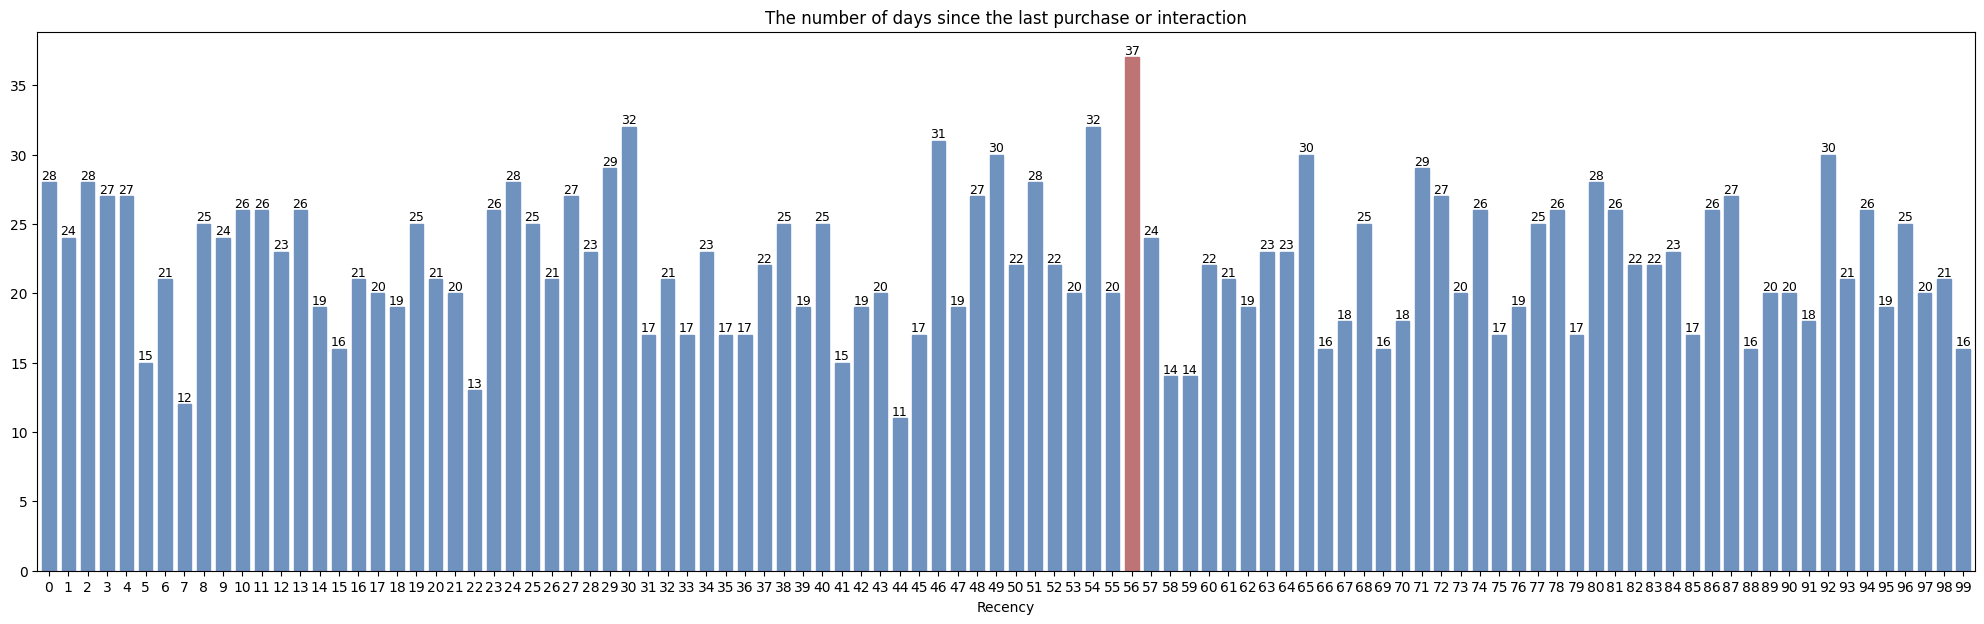

In [ ]:
x = df['Recency'].value_counts()

plt.figure(figsize=(25,7))

# Ordenar os valores
x = x.sort_index()

# Definir cores: cor para o maior valor e outra para os demais
colors = ['#BE7475' if value == x.max() else '#7092BE' for value in x]

# Criar o gráfico de barras
graph = x.plot(kind='bar', color=colors, edgecolor=colors, width=0.7, title='The number of days since the last purchase or interaction')

# Adicionar os valores nas barras
for p in graph.patches:
    graph.annotate(
        str(int(p.get_height())),  # Adicionando o valor em cada barra
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9
    )

# Ajustar a rotação dos rótulos do eixo X
plt.xticks(rotation=0)

# Exibir o gráfico
plt.show()


##8. Distribuição dos produtos


###Categorias de produtos mencionadas no seu dataset:

* Wines: Vinhos
* Fruits: Frutas
* Meat Products: Produtos de Carne
* Fish Products: Produtos de Peixe
* Sweet Products: Produtos Doces
* Gold Products: Produtos de Ouro


In [ ]:
df_products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_products.head()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  
0            88  
1             6  
2            42  
3             5  
4            15

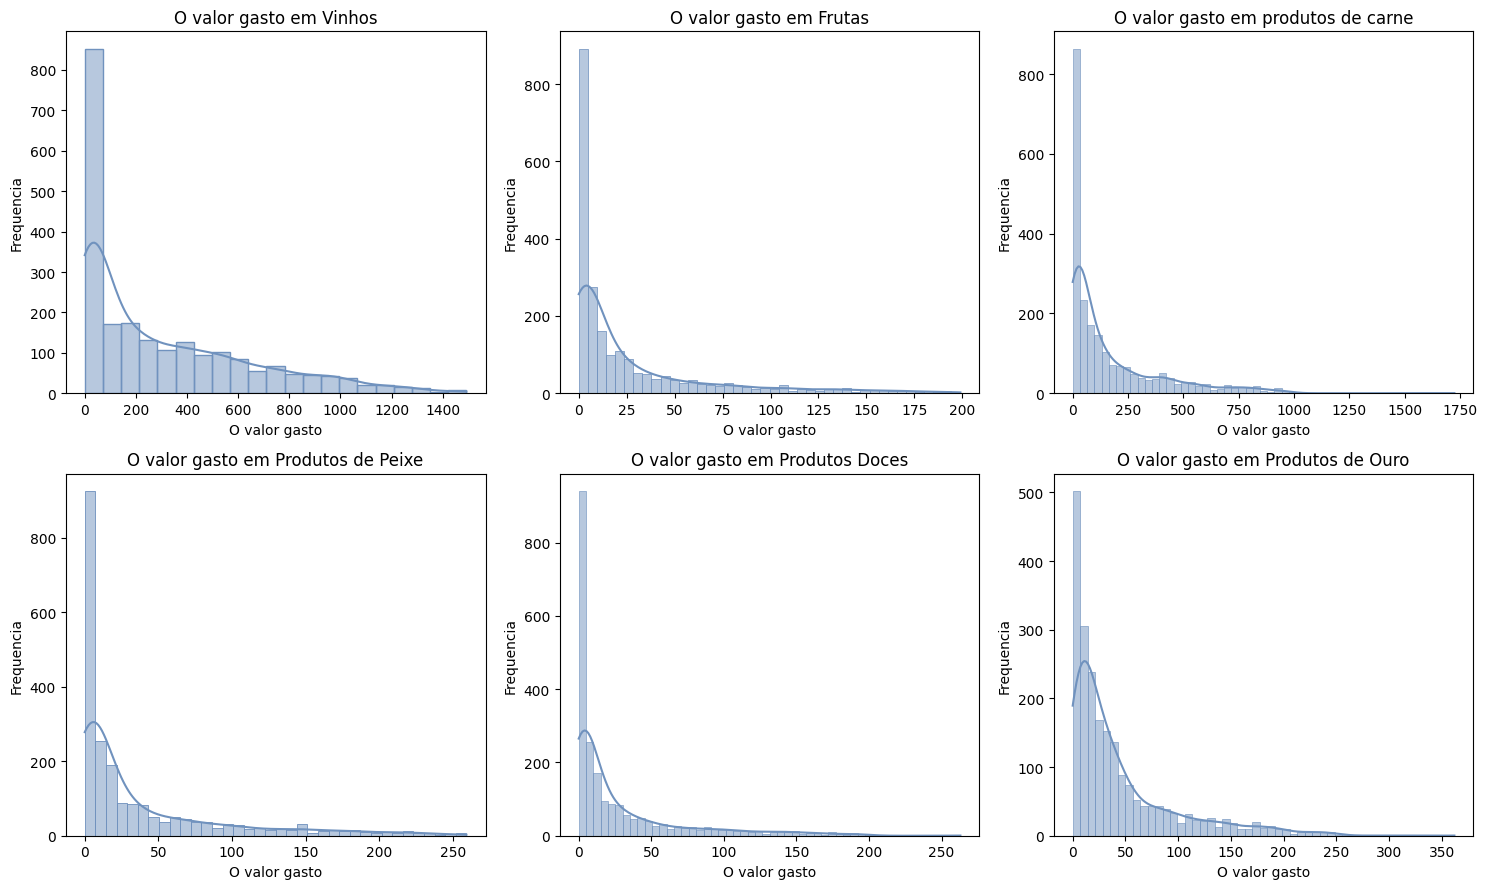

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listando as variáveis para loop
categories = {
    'O valor gasto em Vinhos': df['MntWines'],
    'O valor gasto em Frutas': df['MntFruits'],
    'O valor gasto em produtos de carne': df['MntMeatProducts'],
    'O valor gasto em Produtos de Peixe': df['MntFishProducts'],
    'O valor gasto em Produtos Doces': df['MntSweetProducts'],
    'O valor gasto em Produtos de Ouro': df['MntGoldProds']
}

# Criar a figura
plt.figure(figsize=(15, 9))
col = '#7092BE'

# Loop para criar histogramas
for i, (title, data) in enumerate(categories.items(), start=1):
    plt.subplot(2, 3, i)  # Subplots em grade 2x3
    sns.histplot(data, kde=True, color=col, edgecolor=col)
    plt.title(title)
    plt.xlabel('O valor gasto')
    plt.ylabel('Frequencia')

# Ajustar layout
plt.tight_layout()
plt.show()


##9. Distribuição por tipo de compras e visitas ao site


###Variáveis e seus significados:

* NumDealsPurchases: O número de compras feitas com desconto.

* NumWebPurchases: O número de compras feitas através do site.

* NumCatalogPurchases: O número de compras feitas através de catálogos.

* NumStorePurchases: O número de compras feitas em lojas físicas.

* NumWebVisitsMonth: O número de visitas ao site da empresa em um mês.


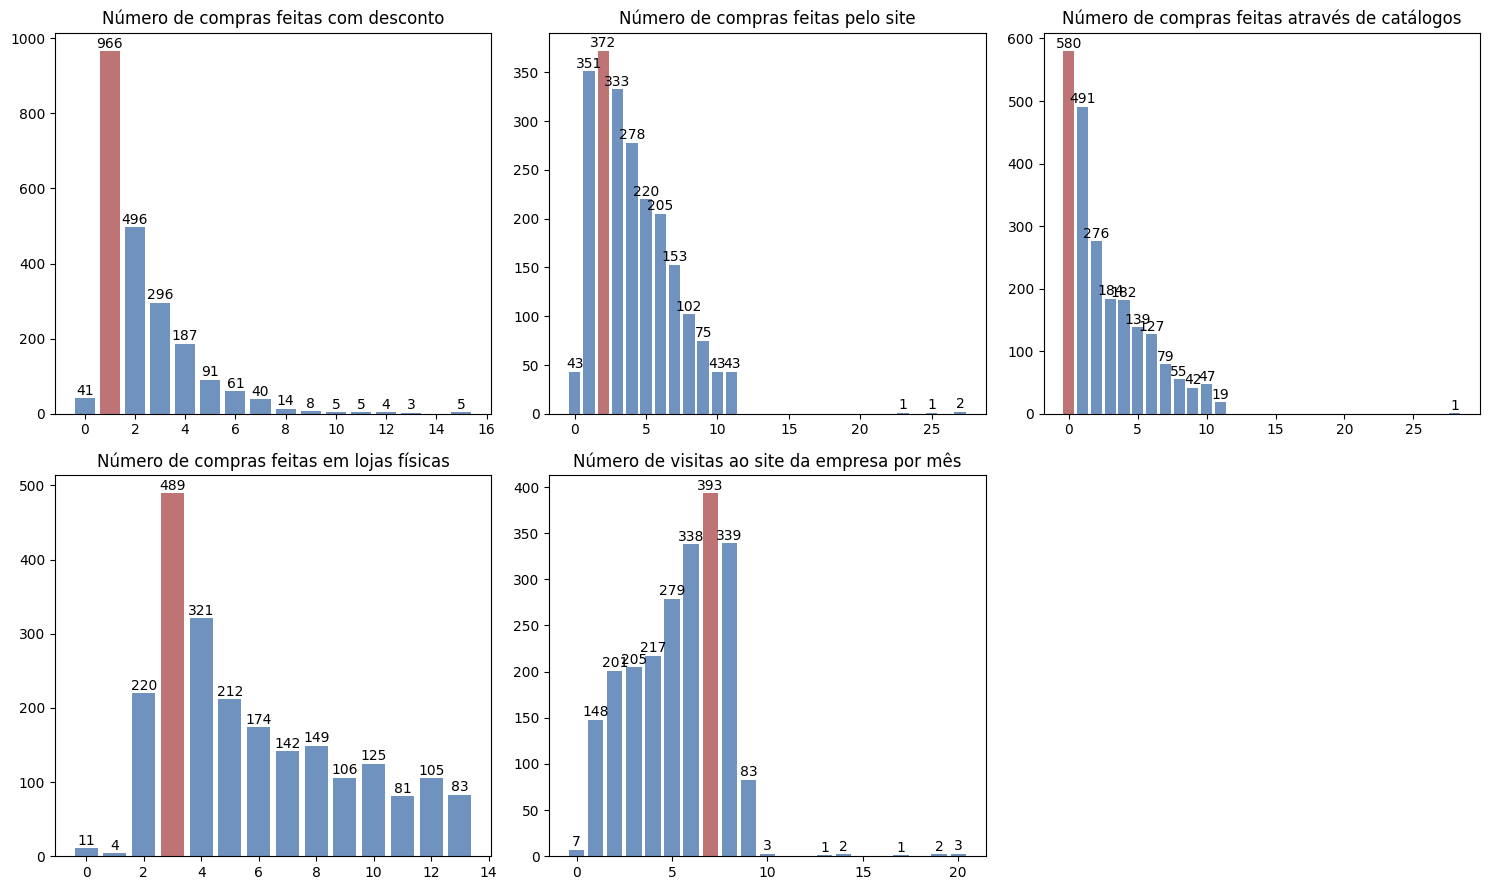

In [ ]:
import matplotlib.pyplot as plt

# Contagem de valores em cada coluna
deals = df['NumDealsPurchases'].value_counts()
web = df['NumWebPurchases'].value_counts()
catalog = df['NumCatalogPurchases'].value_counts()
store = df['NumStorePurchases'].value_counts()
web_visit = df['NumWebVisitsMonth'].value_counts()

# Configuração de tamanho da figura para os gráficos
plt.figure(figsize=(15,9))

# Cores para o gráfico
max_color = '#BE7475'
min_color = '#7092BE'

# Gerando múltiplos gráficos de barras
plt.subplot(2, 3, 1)
bars = plt.bar(deals.index, deals.values, color=[max_color if x == deals.idxmax() else min_color for x in deals.index])
plt.title('Número de compras feitas com desconto')
# Adicionando valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.subplot(2, 3, 2)
bars = plt.bar(web.index, web.values, color=[max_color if x == web.idxmax() else min_color for x in web.index])
plt.title('Número de compras feitas pelo site')
# Adicionando valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.subplot(2, 3, 3)
bars = plt.bar(catalog.index, catalog.values, color=[max_color if x == catalog.idxmax() else min_color for x in catalog.index])
plt.title('Número de compras feitas através de catálogos')
# Adicionando valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.subplot(2, 3, 4)
bars = plt.bar(store.index, store.values, color=[max_color if x == store.idxmax() else min_color for x in store.index])
plt.title('Número de compras feitas em lojas físicas')
# Adicionando valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.subplot(2, 3, 5)
bars = plt.bar(web_visit.index, web_visit.values, color=[max_color if x == web_visit.idxmax() else min_color for x in web_visit.index])
plt.title('Número de visitas ao site da empresa por mês')
# Adicionando valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Ajuste de layout para evitar sobreposição de gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()



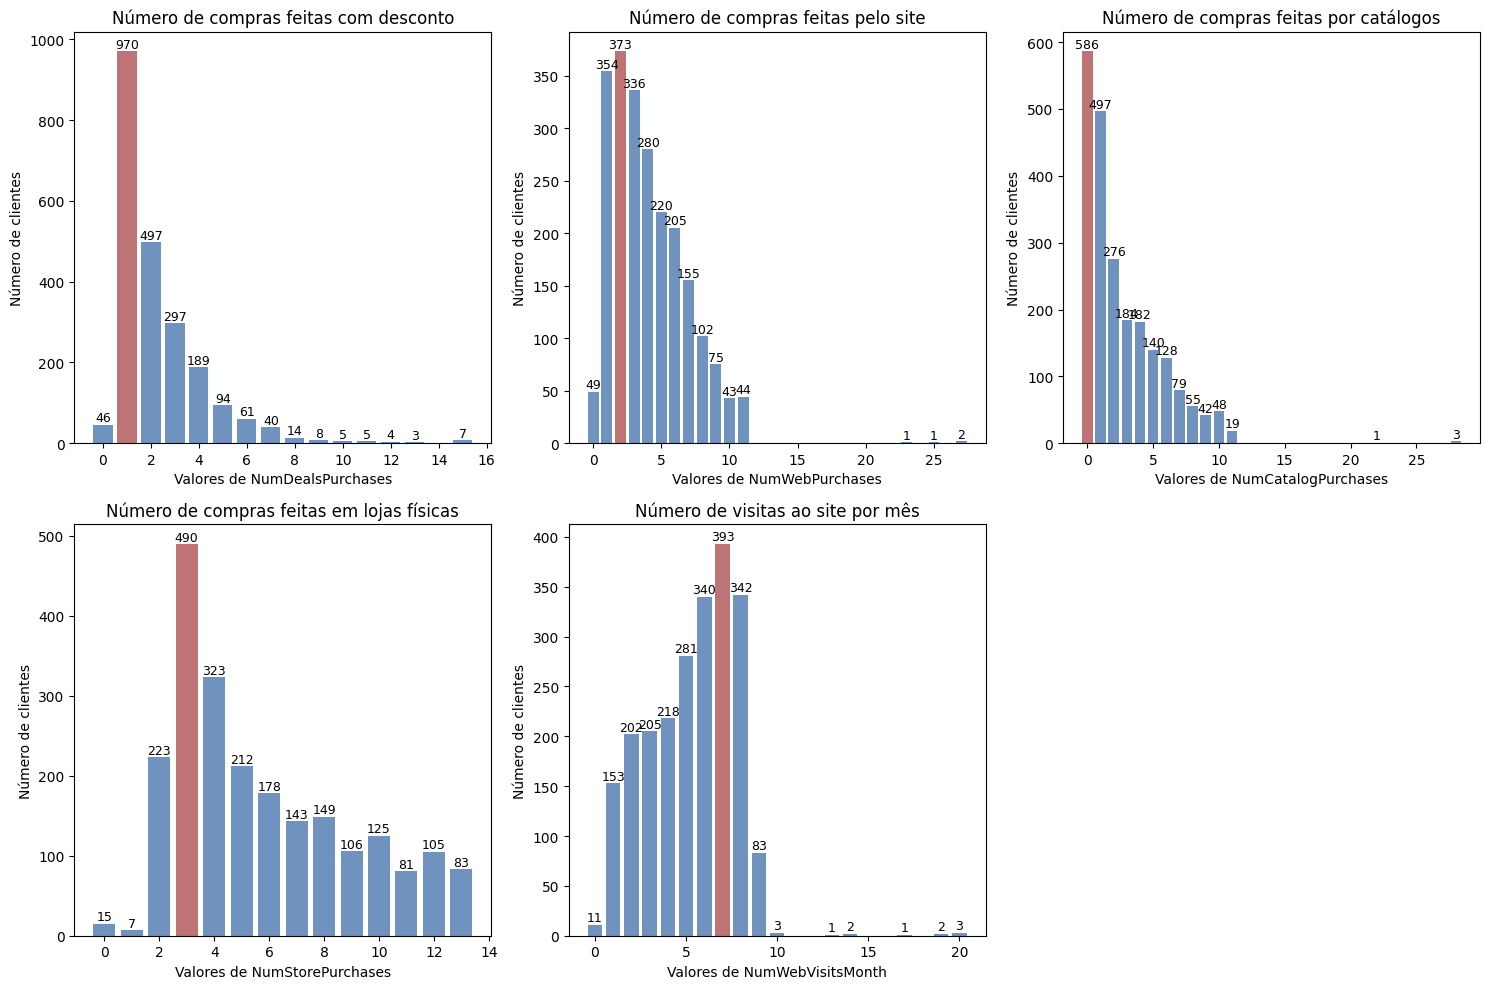

In [ ]:
# Contagem de valores para as variáveis selecionadas
variables = {
    "NumDealsPurchases": "Número de compras feitas com desconto",
    "NumWebPurchases": "Número de compras feitas pelo site",
    "NumCatalogPurchases": "Número de compras feitas por catálogos",
    "NumStorePurchases": "Número de compras feitas em lojas físicas",
    "NumWebVisitsMonth": "Número de visitas ao site por mês"
}

# Configuração do gráfico
plt.figure(figsize=(15, 10))  # Tamanho ajustado para legibilidade
colors = ['#7092BE' if x != 0 else '#BE7475' for x in range(6)]  # Cores para barras

# Gerar gráficos iterativamente
for i, (col, title) in enumerate(variables.items(), 1):
    counts = df[col].value_counts()  # Contagem de valores para cada variável
    plt.subplot(2, 3, i)  # Posicionamento do gráfico

    # Gráfico de barras
    bars = plt.bar(
        counts.index, counts.values, color=[colors[0] if x == counts.idxmax() else colors[1] for x in counts.index]
    )
    plt.title(title, fontsize=12)  # Título do gráfico
    plt.xlabel(f"Valores de {col}", fontsize=10)  # Label do eixo X
    plt.ylabel("Número de clientes", fontsize=10)  # Label do eixo Y

    # Adicionar valores acima das barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval),
            ha='center', va='bottom', fontsize=9
        )

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

##10. Aceitação da campanhas

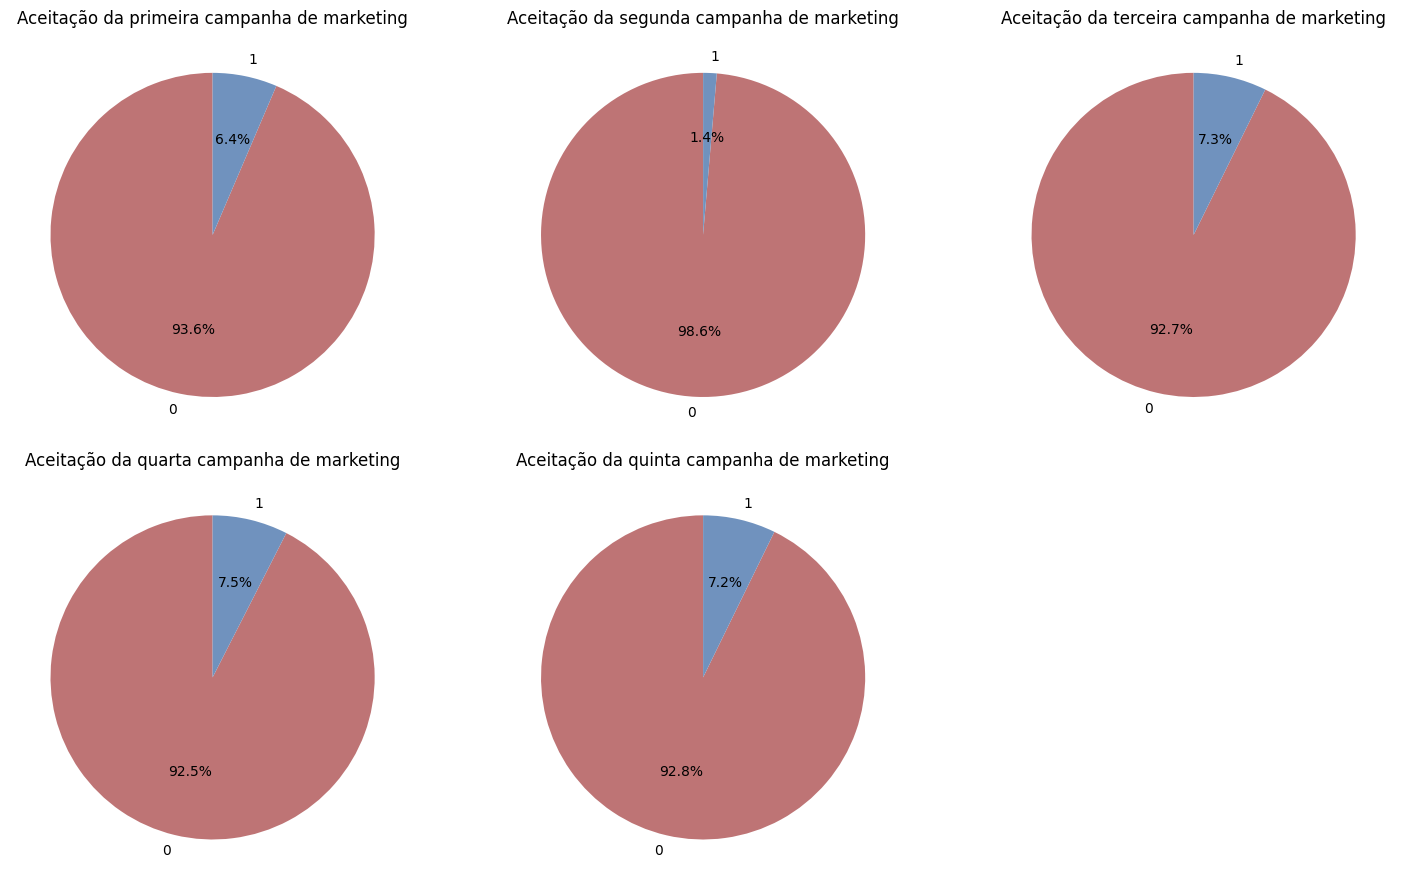

In [ ]:
import matplotlib.pyplot as plt

# Contagem de valores em cada coluna
mp1 = df['AcceptedCmp1'].value_counts()
mp2 = df['AcceptedCmp2'].value_counts()
mp3 = df['AcceptedCmp3'].value_counts()
mp4 = df['AcceptedCmp4'].value_counts()
mp5 = df['AcceptedCmp5'].value_counts()

# Configuração do tamanho da figura para os gráficos
plt.figure(figsize=(15,9))

# Cores para o gráfico
max_color = '#BE7475'
min_color = '#7092BE'

# Função para desenhar gráfico de pizza com título e valores
def plot_pie(ax, data, title):
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=[max_color, min_color], startangle=90)
    ax.set_title(title)

# Gerando gráficos de pizza com os títulos traduzidos
ax1 = plt.subplot(2, 3, 1)
plot_pie(ax1, mp1, 'Aceitação da primeira campanha de marketing')

ax2 = plt.subplot(2, 3, 2)
plot_pie(ax2, mp2, 'Aceitação da segunda campanha de marketing')

ax3 = plt.subplot(2, 3, 3)
plot_pie(ax3, mp3, 'Aceitação da terceira campanha de marketing')

ax4 = plt.subplot(2, 3, 4)
plot_pie(ax4, mp4, 'Aceitação da quarta campanha de marketing')

ax5 = plt.subplot(2, 3, 5)
plot_pie(ax5, mp5, 'Aceitação da quinta campanha de marketing')

# Ajustando o layout
plt.tight_layout()
plt.show()


##12 - Correlação dos dados numericos

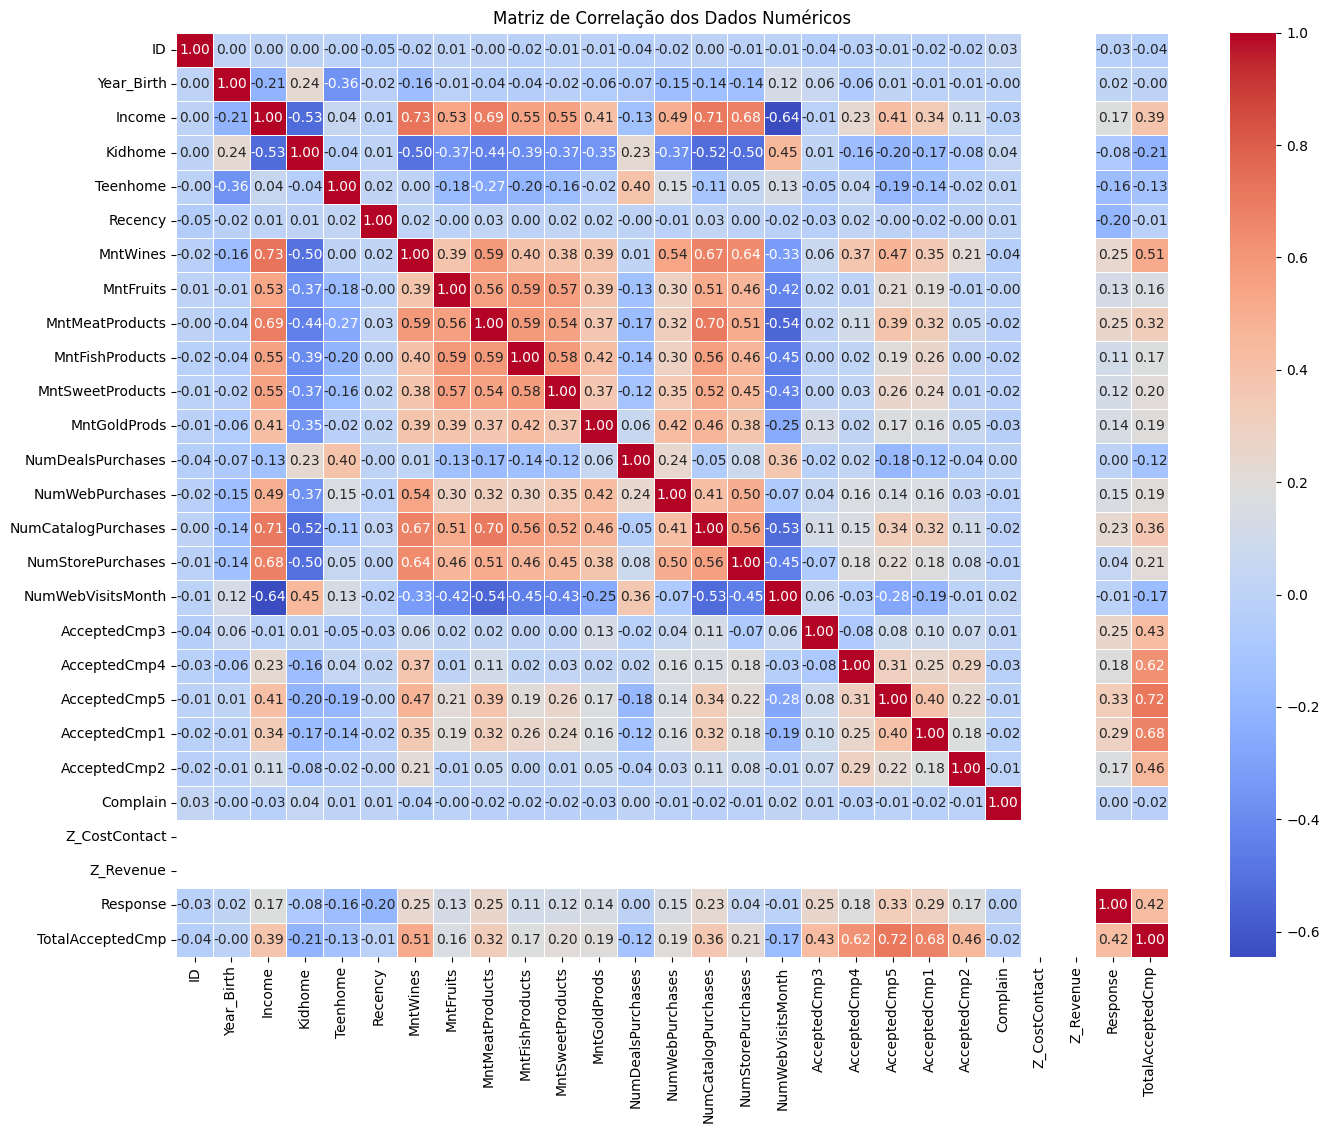

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calculando a correlação entre as colunas numéricas
correlation_matrix = numeric_df.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação dos Dados Numéricos')
plt.show()


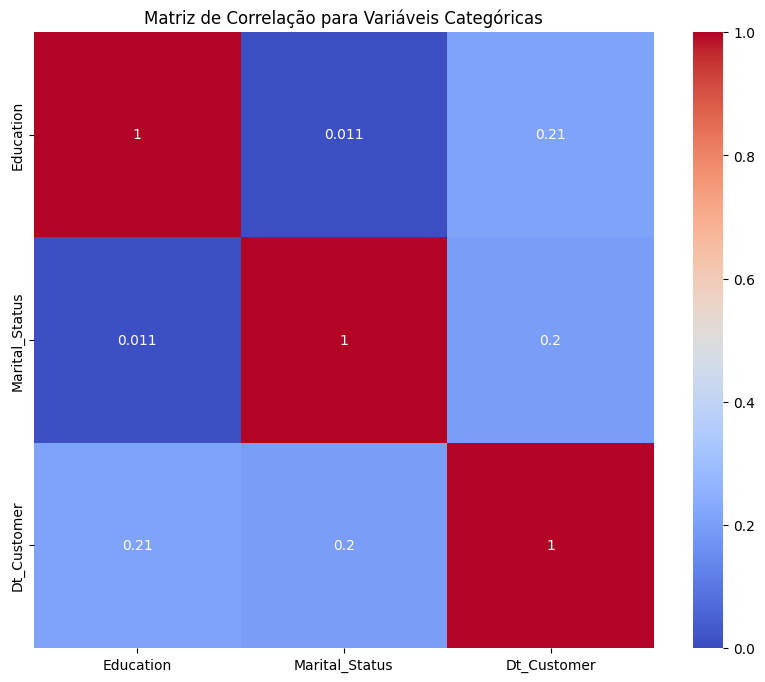

In [ ]:
# Análise de Correlação para Variáveis Categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Selecionando as variáveis categóricas
categorical_df = df.select_dtypes(include=['object', 'category'])

# Criando uma matriz para armazenar as correlações
correlation_matrix = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

# Calculando a correlação entre todas as variáveis categóricas
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmax=1, vmin=0)
plt.title('Matriz de Correlação para Variáveis Categóricas')
plt.show()


##Distribuição por Segmentos de Consumidores

###Agrupamento por faixas de renda (Income)

<ipython-input-36-313d6b88578e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renda_aceitacao = df.groupby('Faixa_de_Renda')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()


<Figure size 1000x600 with 0 Axes>

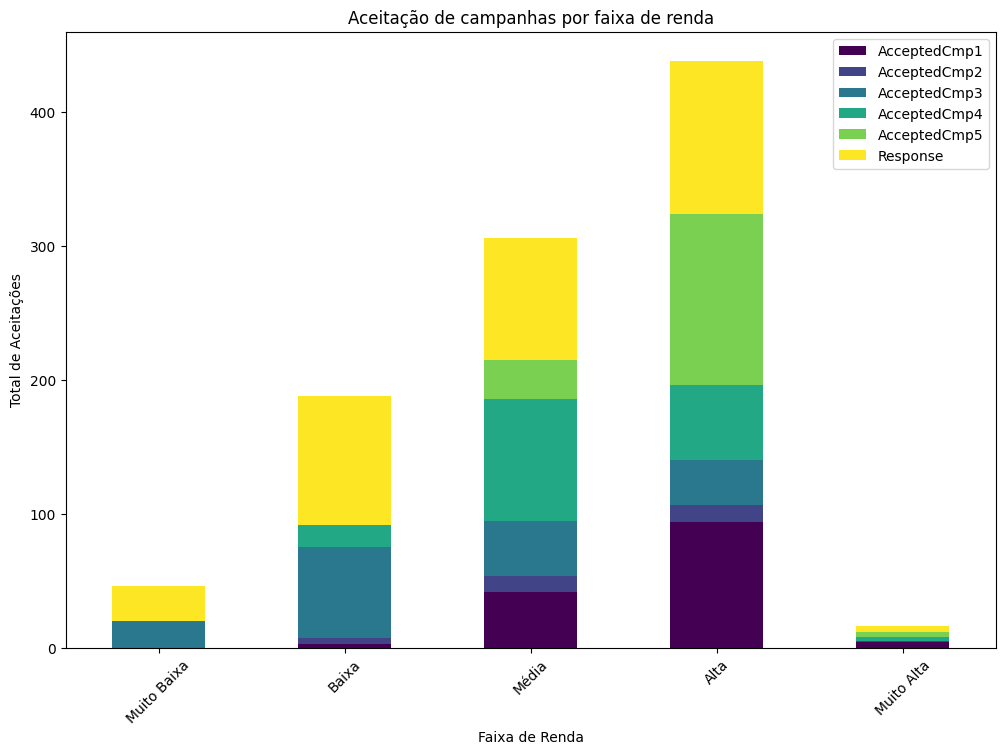

In [ ]:
# Criando categorias de renda
bins = [0, 25000, 50000, 75000, 100000, df['Income'].max()]
labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']
df['Faixa_de_Renda'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)

# Contagem de aceitação por faixa de renda
renda_aceitacao = df.groupby('Faixa_de_Renda')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Visualizando
plt.figure(figsize=(10, 6))
renda_aceitacao.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Aceitação de campanhas por faixa de renda')
plt.ylabel('Total de Aceitações')
plt.xlabel('Faixa de Renda')
plt.xticks(rotation=45)
plt.show()


### Análise por nível de educação (Education)

<Figure size 1000x600 with 0 Axes>

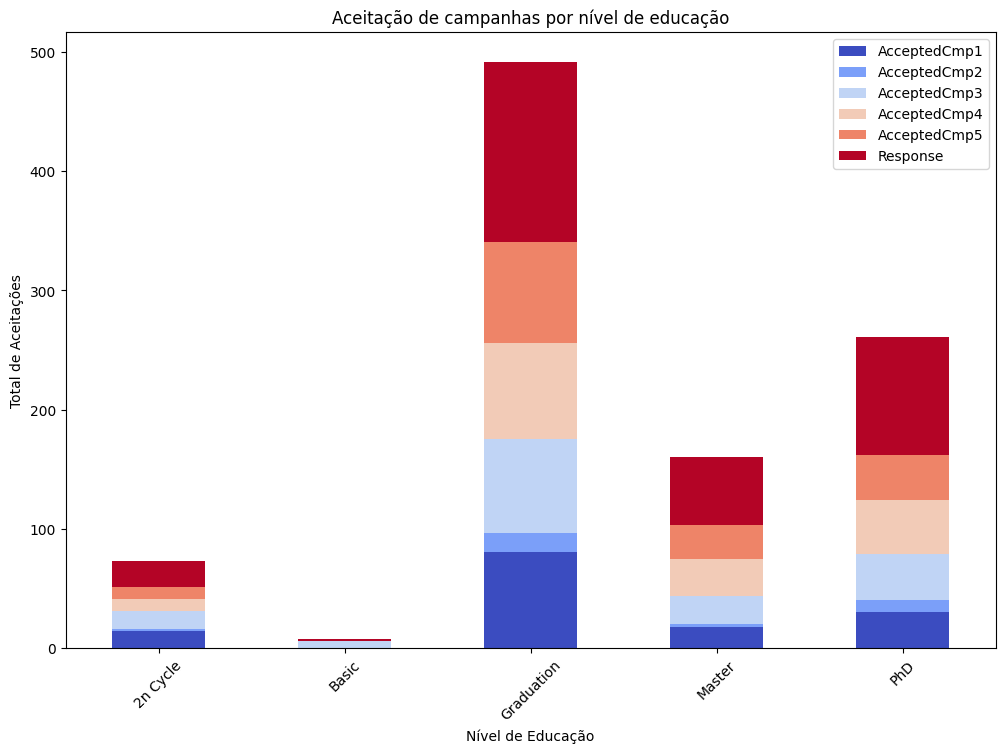

In [ ]:
# Contagem de aceitação por nível de educação
educacao_aceitacao = df.groupby('Education')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Visualizando
plt.figure(figsize=(10, 6))
educacao_aceitacao.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 8))
plt.title('Aceitação de campanhas por nível de educação')
plt.ylabel('Total de Aceitações')
plt.xlabel('Nível de Educação')
plt.xticks(rotation=45)
plt.show()


###Faixas Etárias




In [ ]:
from datetime import datetime

# Calcular a idade
current_year = datetime.now().year
df['Idade'] = current_year - df['Year_Birth']

# Criar categorias de idade
bins_age = [18, 25, 35, 45, 55, 65, df['Idade'].max()]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=bins_age, labels=labels_age, include_lowest=True)

# Verificando o resultado
print(df[['Year_Birth', 'Idade', 'Faixa_Etaria']].head())


   Year_Birth  Idade Faixa_Etaria
0        1957     67          66+
1        1954     70          66+
2        1965     59        56-65
3        1984     40        36-45
4        1981     43        36-45


<ipython-input-44-e87e9e81a9e5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_aceitacao = df.groupby('Faixa_Etaria')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()


<Figure size 1000x600 with 0 Axes>

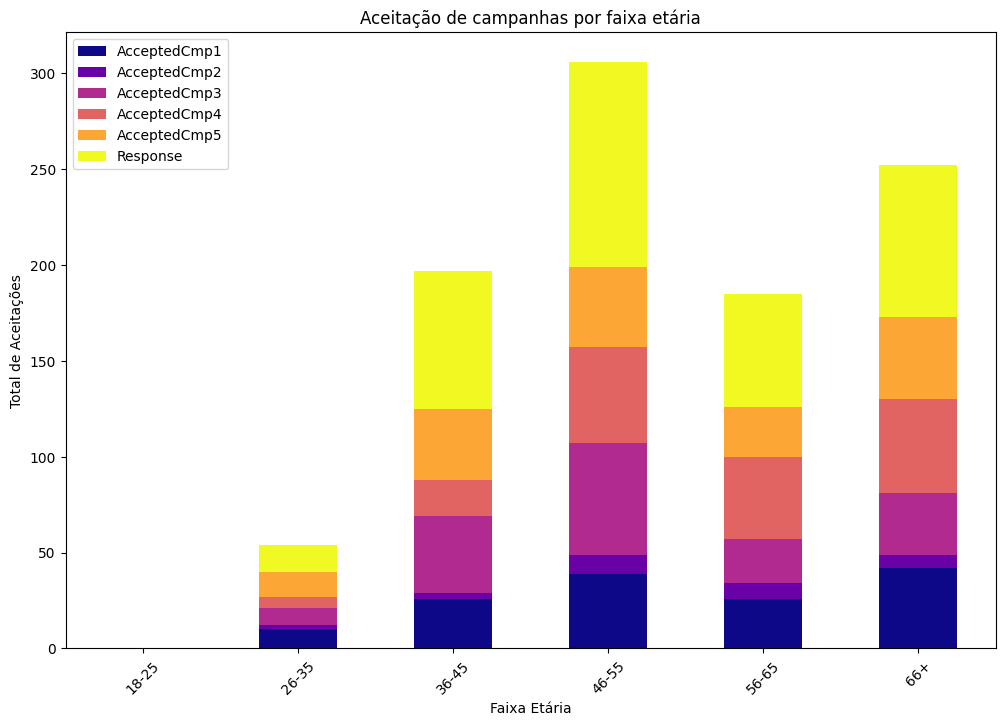

In [ ]:
# Contagem de aceitação por faixa etária
idade_aceitacao = df.groupby('Faixa_Etaria')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

# Visualizando os dados
plt.figure(figsize=(10, 6))
idade_aceitacao.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 8))
plt.title('Aceitação de campanhas por faixa etária')
plt.ylabel('Total de Aceitações')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=45)
plt.show()


In [ ]:
faixa_etaria_counts = df['Faixa_Etaria'].value_counts().sort_index()

<ipython-input-46-633bdddbdeea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette='plasma')  # Cria o gráfico de barras


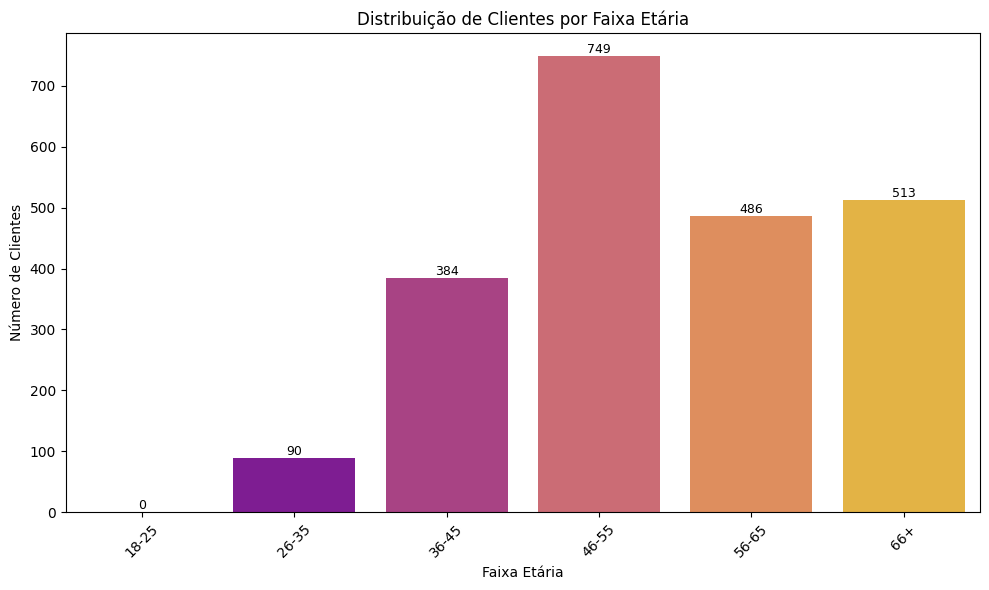

In [ ]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette='plasma')  # Cria o gráfico de barras
plt.title('Distribuição de Clientes por Faixa Etária')  # Define o título do gráfico
plt.xlabel('Faixa Etária')  # Define o rótulo do eixo x
plt.ylabel('Número de Clientes')  # Define o rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Exibe os valores em cada barra
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=9)

plt.tight_layout()  # Ajusta o layout do gráfico
plt.show()  # Exibe o gráfico

## Análise Multivariada

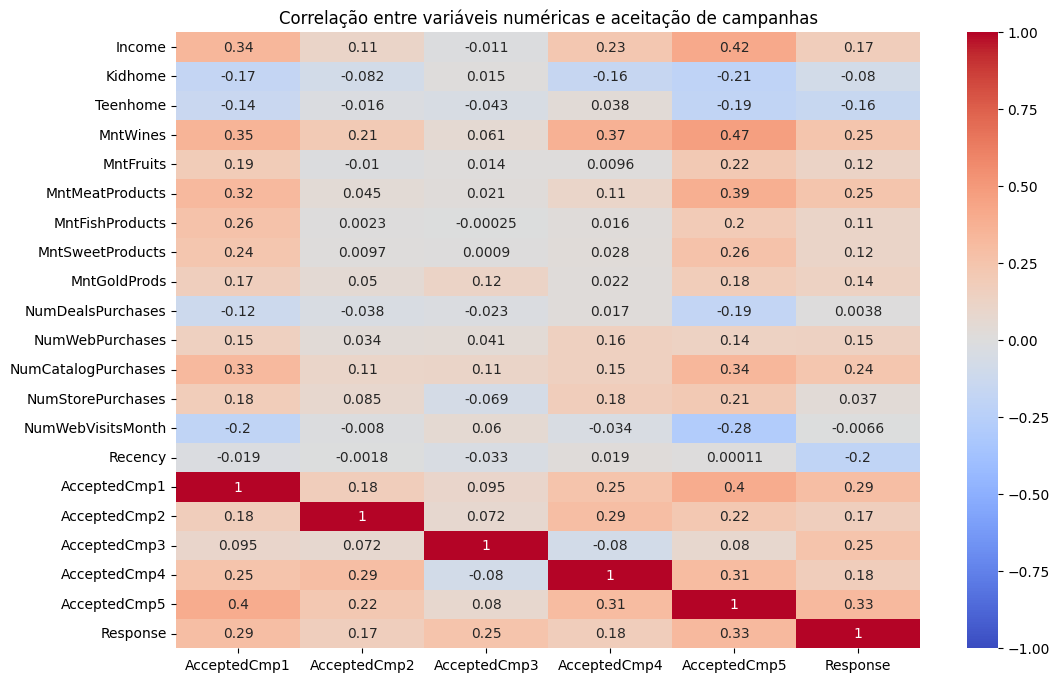

In [ ]:
# Correlação Multivariada (Aceitação e Variáveis Numéricas)
#variáveis numéricas relevantes
numeric_features = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'Recency']
acceptance_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calcular correlações
correlation_matrix = df[numeric_features + acceptance_features].corr()

# Plotar correlação (focando nas colunas de aceitação)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[acceptance_features], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre variáveis numéricas e aceitação de campanhas')
plt.show()


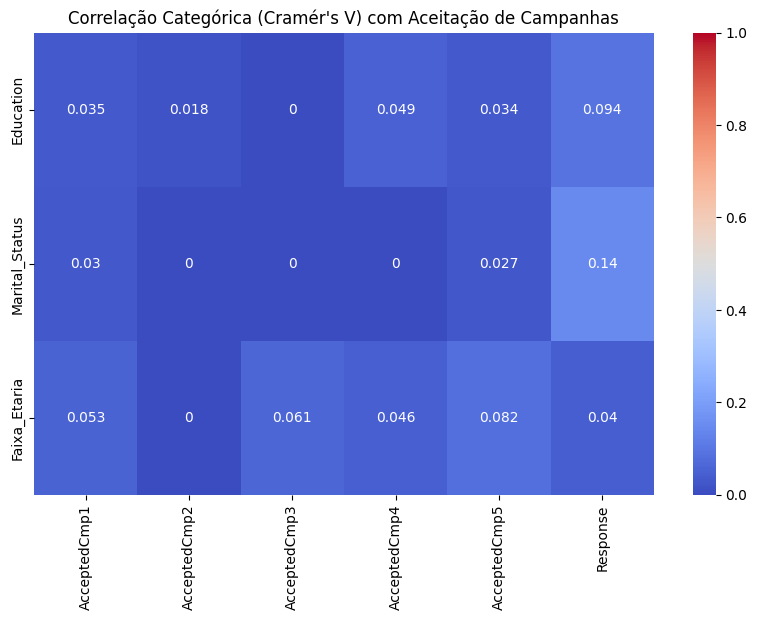

In [ ]:
# Análise de correlação para variáveis categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_features = ['Education', 'Marital_Status', 'Faixa_Etaria']

# Criar matriz de correlação para variáveis categóricas
cramers_matrix = pd.DataFrame(index=categorical_features, columns=acceptance_features)

for cat in categorical_features:
    for acc in acceptance_features:
        cramers_matrix.loc[cat, acc] = cramers_v(df[cat], df[acc])

# Converter valores para float para o heatmap
cramers_matrix = cramers_matrix.astype(float)

# Plotar a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Correlação Categórica (Cramér's V) com Aceitação de Campanhas")
plt.show()


##Comparação entre Tipos de Produtos

###Proporção de Gasto por Categoria de Produto

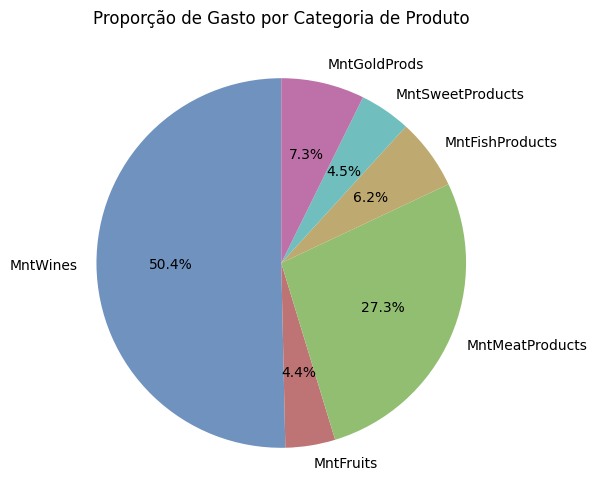

In [ ]:
# Somar os gastos totais para cada cliente
df['Gasto_Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calcular a proporção de cada categoria
proporcao_produtos = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum() / df['Gasto_Total'].sum()

# Plotando as proporções
plt.figure(figsize=(8, 6))
proporcao_produtos.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#7092BE', '#BE7475', '#92BE71', '#BEA971', '#71BEBE', '#BE71A9'])
plt.title('Proporção de Gasto por Categoria de Produto')
plt.ylabel('')
plt.show()


In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  04-09-2012       58       635  ...             0         0              3   
1  08-03-2014       38        11  ...             0         0              3   
2  21-08-2013       26       426  ...             0         0              3   
3  10-02-2014       26        11  ...             0         0              3   
4  19-01-2014       94       173  ...             0         0              3   

   Z_Revenue  Response  TotalAcceptedCmp  Faixa_de_Renda  Idade  Faixa_Etaria  \
0         11         1                 0           Média     67           66+   
1         11         0                 0           Baixa     70           66+   
2         11         0                 0           Média     59         56-65   
3         11         0                 0           Baixa     40         36-45   
4         11         0                 0           Média     43         36-45   

   Gasto_Total  
0         1617  
1           27  
2          776  
3           53  
4          422  

[5 rows x 34 columns]

## Gastos por Faixa Etária

<ipython-input-38-890af801dcd8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_faixa_etaria = df.groupby('Faixa_Etaria')[['MntWines', 'MntFruits', 'MntMeatProducts',


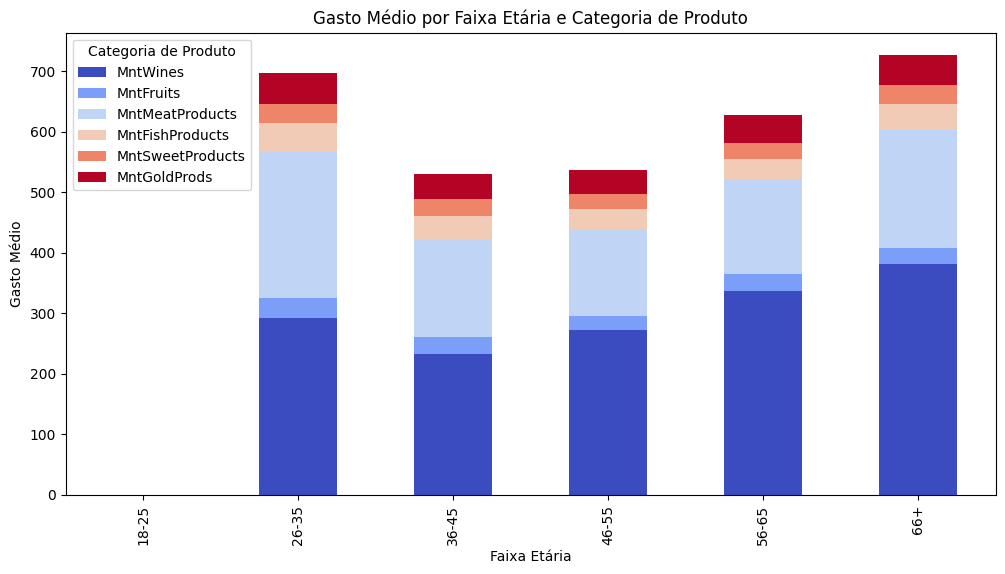

In [ ]:
# Gastos médios por faixa etária
gastos_faixa_etaria = df.groupby('Faixa_Etaria')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plotando os gastos por faixa etária
gastos_faixa_etaria.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Gasto Médio por Faixa Etária e Categoria de Produto')
plt.xlabel('Faixa Etária')
plt.ylabel('Gasto Médio')
plt.legend(title='Categoria de Produto')
plt.show()


## Produtos Mais Comprados por Faixa de Renda

<ipython-input-40-ef0dbc7d67bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_faixa_renda = df.groupby('Faixa_de_Renda')[['MntWines', 'MntFruits', 'MntMeatProducts',


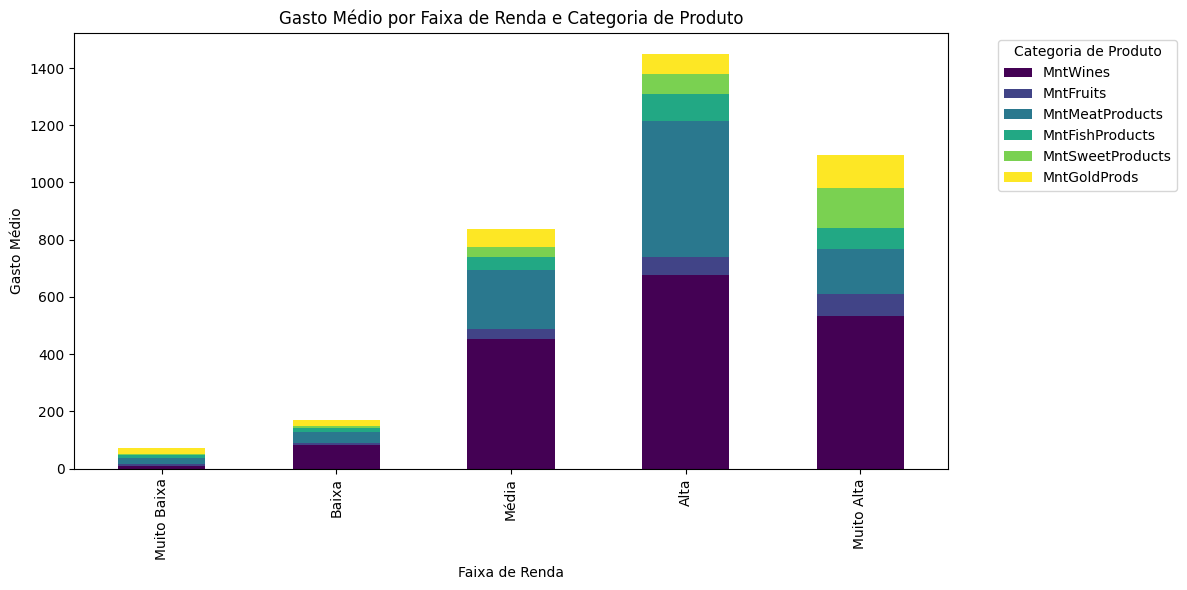

In [ ]:
# Gastos médios por faixa de renda
gastos_faixa_renda = df.groupby('Faixa_de_Renda')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plotando os gastos por faixa de renda
gastos_faixa_renda.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Gasto Médio por Faixa de Renda e Categoria de Produto')
plt.xlabel('Faixa de Renda')
plt.ylabel('Gasto Médio')
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##Correlação entre Categorias de Produto

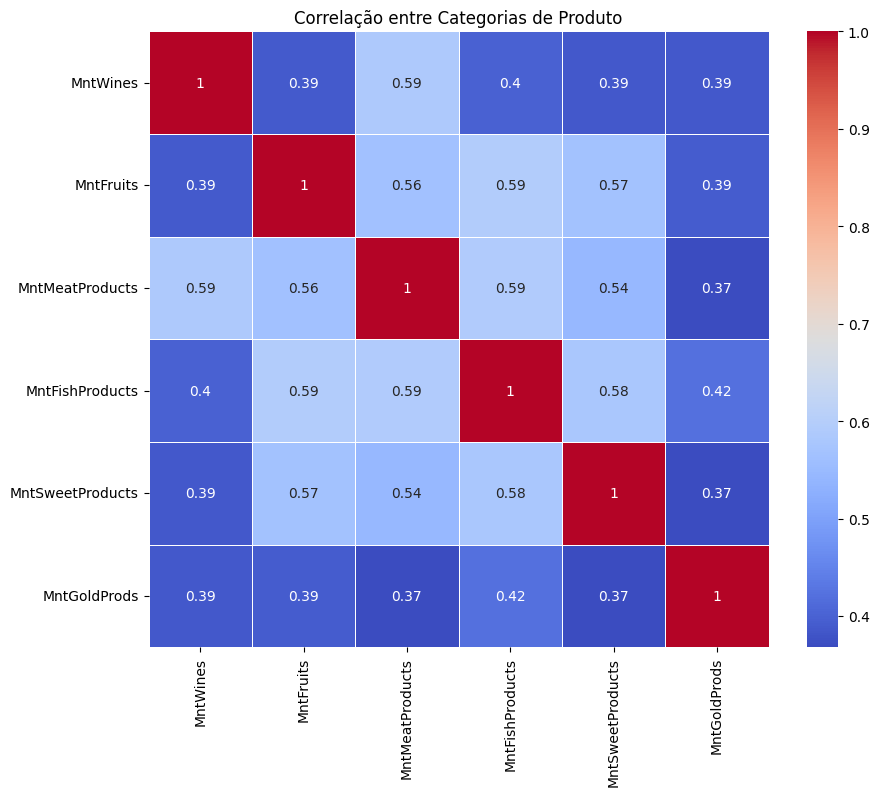

In [ ]:
# Correlação entre categorias de produtos
correlacao_produtos = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_produtos, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlação entre Categorias de Produto')
plt.show()


##Comparação entre Categorias e Respostas às Campanhas

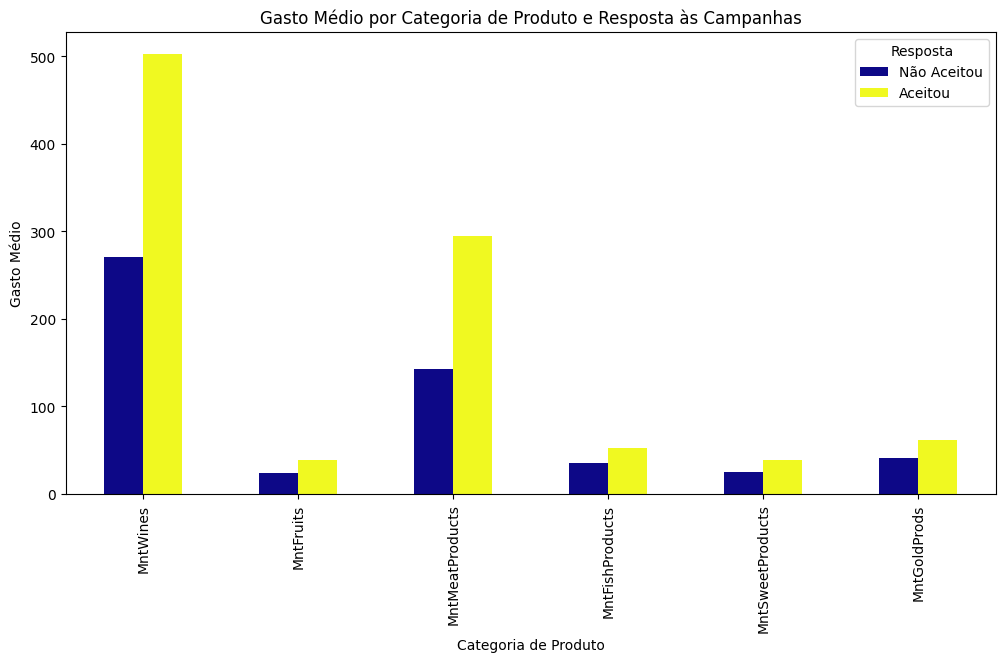

In [ ]:
# Gastos médios em cada categoria para quem aceitou ou não as campanhas
gastos_campanhas = df.groupby('Response')[['MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

# Plotando a comparação
gastos_campanhas.T.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Gasto Médio por Categoria de Produto e Resposta às Campanhas')
plt.xlabel('Categoria de Produto')
plt.ylabel('Gasto Médio')
plt.legend(title='Resposta', labels=['Não Aceitou', 'Aceitou'])
plt.show()


## Pairplot Destacando Gasto por Categoria

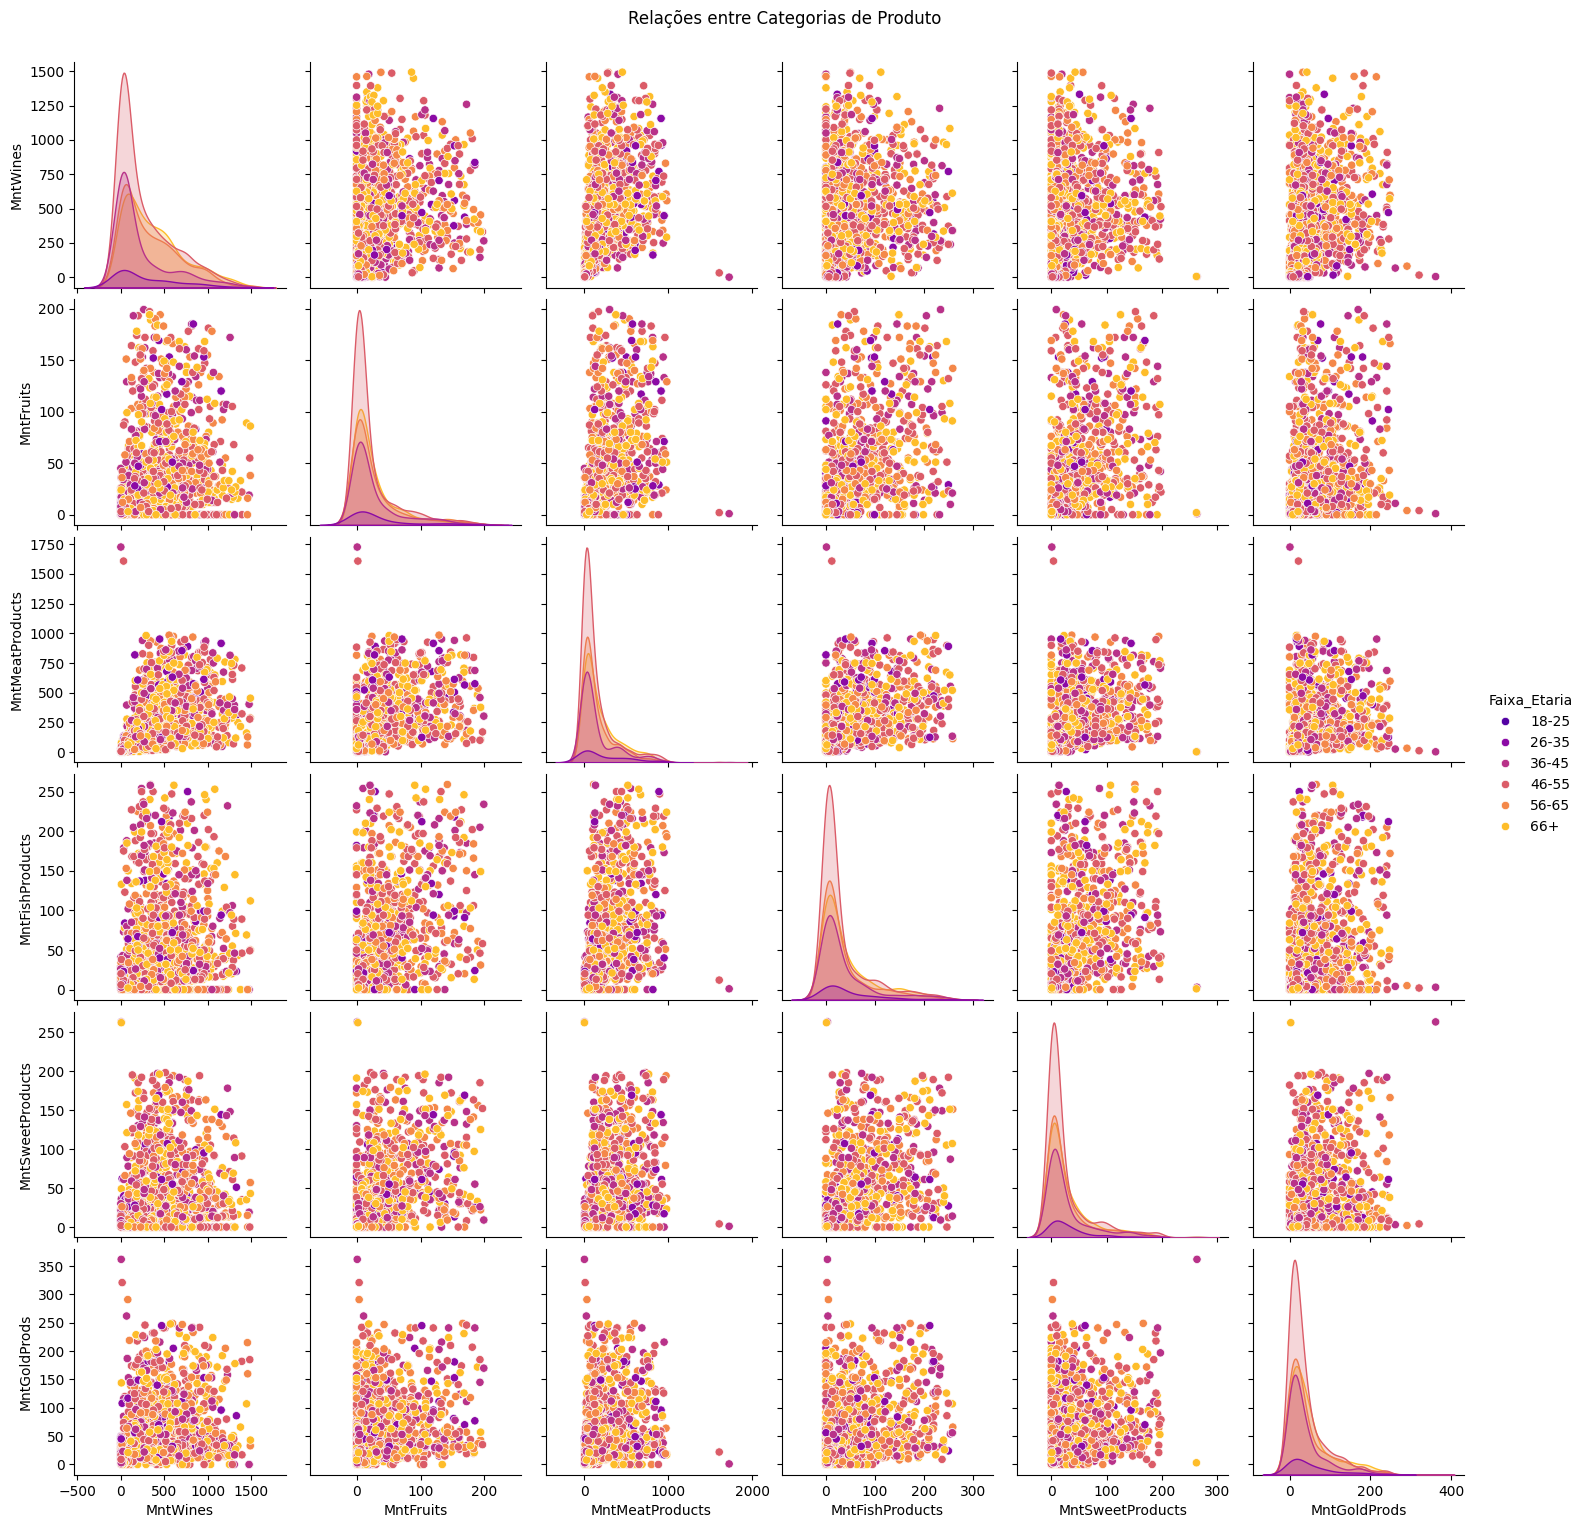

In [ ]:
sns.pairplot(df, vars=['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
             hue='Faixa_Etaria', palette='plasma', diag_kind='kde')
plt.suptitle('Relações entre Categorias de Produto', y=1.02)
plt.show()


## Distribuição de Compras por Canais

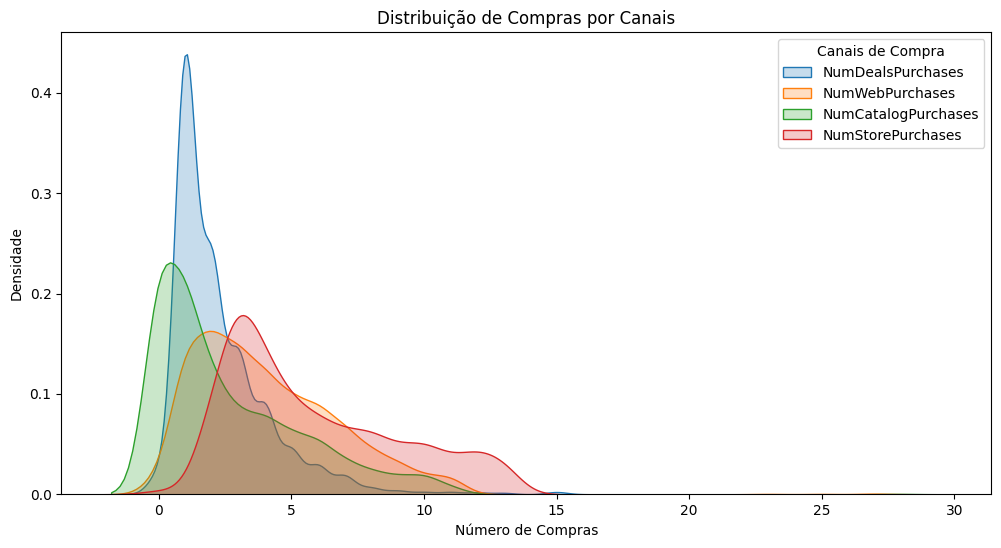

In [ ]:
canais = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(12, 6))
for canal in canais:
    sns.kdeplot(df[canal], label=canal, fill=True)

plt.title('Distribuição de Compras por Canais')
plt.xlabel('Número de Compras')
plt.ylabel('Densidade')
plt.legend(title='Canais de Compra')
plt.show()


##Análise de Outliers

###A análise de outliers permite identificar valores extremos nos dados que podem impactar os resultados da análise.

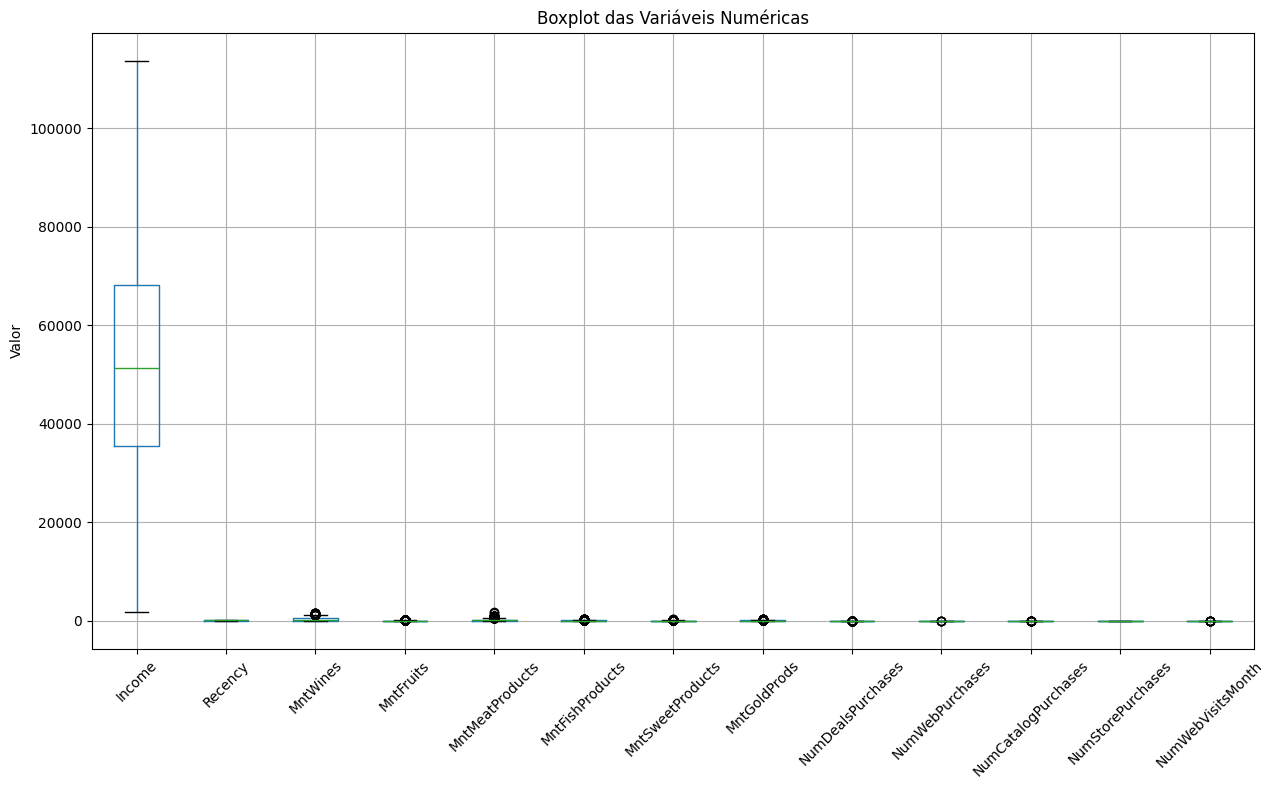

In [ ]:
numericas = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(15, 8))
df[numericas].boxplot()
plt.title('Boxplot das Variáveis Numéricas')
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.show()


##Identificação de Outliers usando Z-Score

In [ ]:
from scipy.stats import zscore

# Calculando o Z-Score para variáveis numéricas
z_scores = df[numericas].apply(zscore)

# Identificando outliers (valores absolutos do Z acima de 3)
outliers = (z_scores.abs() > 3).sum()

print("Número de outliers por variável:")
print(outliers)


Número de outliers por variável:
Income                  1
Recency                 0
MntWines               15
MntFruits              64
MntMeatProducts        44
MntFishProducts        58
MntSweetProducts       57
MntGoldProds           44
NumDealsPurchases      30
NumWebPurchases         4
NumCatalogPurchases     1
NumStorePurchases       0
NumWebVisitsMonth       9
dtype: int64


##Detecção de Outliers com o Método IQR (Interquartile Range)

In [ ]:
outlier_counts = {}
for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_counts[col] = len(outliers)

print("Número de outliers por variável (IQR):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")


Número de outliers por variável (IQR):
Income: 0
Recency: 0
MntWines: 35
MntFruits: 248
MntMeatProducts: 173
MntFishProducts: 223
MntSweetProducts: 240
MntGoldProds: 206
NumDealsPurchases: 84
NumWebPurchases: 4
NumCatalogPurchases: 20
NumStorePurchases: 0
NumWebVisitsMonth: 8


## Visualização dos Outliers por Variável

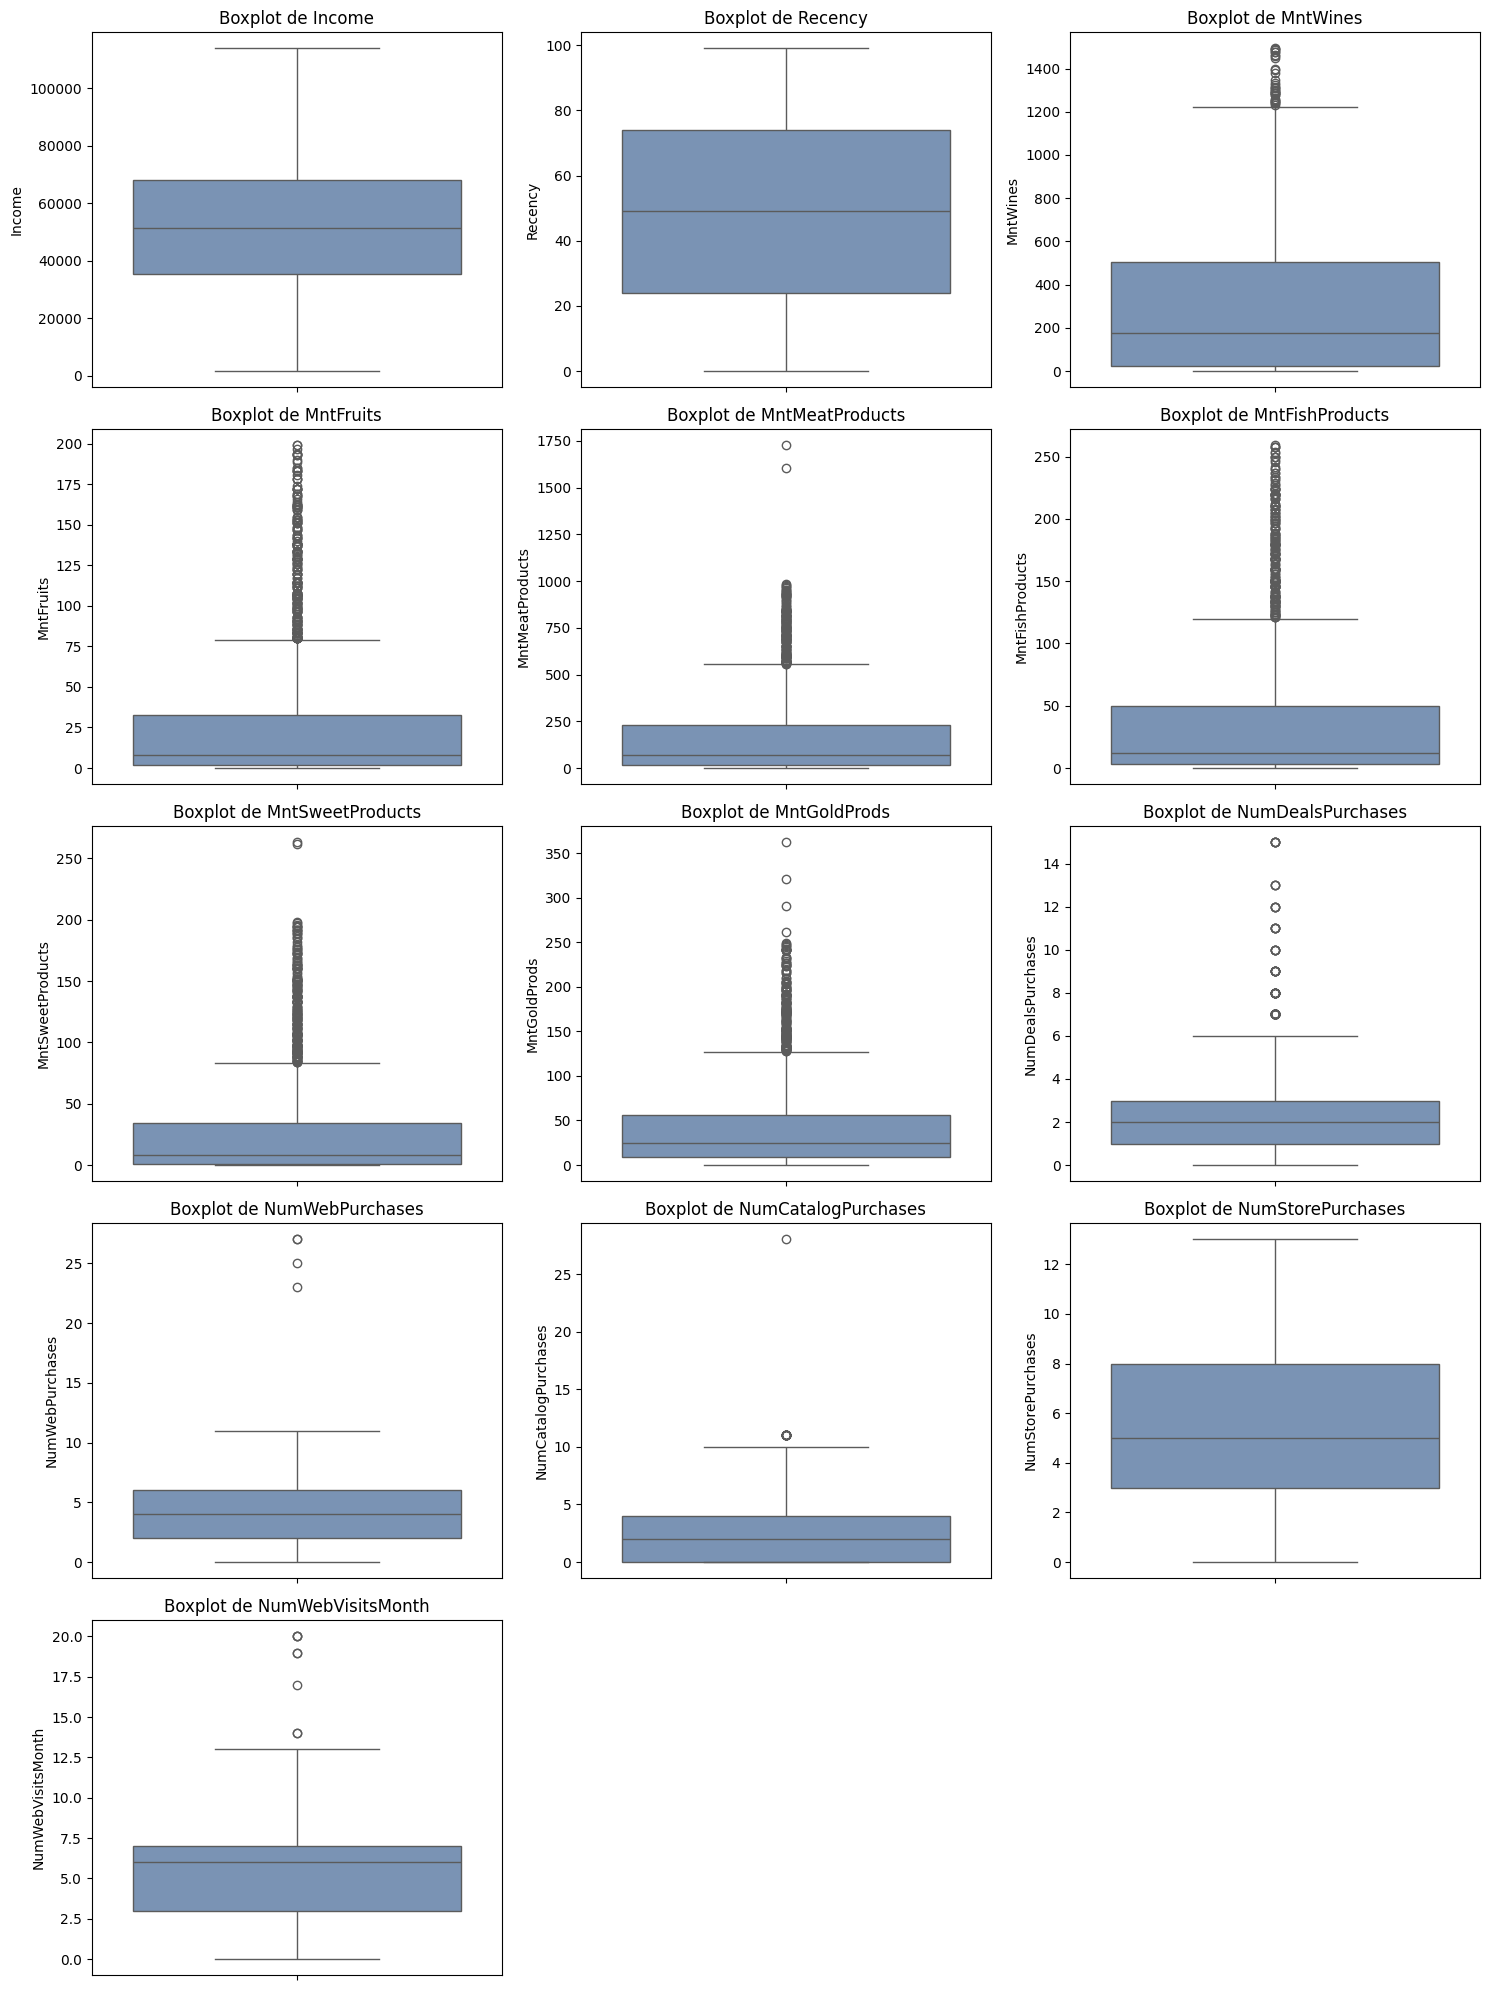

In [ ]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(numericas, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col], color='#7092BE')
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


# Problemas de negocio e perguntas de interesse pós analise exploratória

**Conclusões e Insights da Análise de Dados de Clientes**  
Realizamos uma análise exploratória detalhada de um conjunto de dados de clientes, com o objetivo de entender o comportamento, as preferências e as características demográficas dos clientes, além de como esses fatores se relacionam com a resposta às campanhas de marketing. Através da visualização de dados, estatísticas descritivas e análise multivariada, diversas informações importantes foram reveladas, fornecendo insights valiosos para a empresa.  

**Perfil do Cliente e Comportamento de Compra**  
Dados Demográficos: A análise demográfica revelou que a maioria dos clientes tem idade entre 46 e 59 anos, possui graduação e são casados. A renda anual dos clientes varia consideravelmente, com a maioria se concentrando na faixa de renda média e alta. Essa informação é crucial para segmentar os clientes e personalizar as campanhas de marketing.

**Hábitos de Compra:** O estudo dos hábitos de compra mostrou que os clientes tendem a comprar mais em lojas físicas e no site da empresa. As compras por catálogo são menos frequentes, indicando uma possível preferência por canais digitais e lojas tradicionais. As compras com desconto são populares, sugerindo que os clientes são sensíveis a preços e promoções.

**Categorias de Produtos:** A análise da distribuição de gastos por categoria de produto revelou que os clientes gastam mais em vinhos, seguido por produtos de carne e produtos premium. As frutas, produtos de peixe e produtos doces representam uma parcela menor dos gastos totais. Essa informação é importante para direcionar as campanhas de marketing para produtos específicos e otimizar o mix de produtos oferecido.

**Resposta às Campanhas de Marketing**
Aceitação de Campanhas: A análise da resposta às campanhas de marketing indicou que a maioria dos clientes não aceitou as campanhas anteriores. No entanto, a quarta campanha teve a maior taxa de aceitação, seguida pela quinta e terceira campanhas. A primeira e a segunda campanha tiveram as menores taxas de aceitação. Essa informação é importante para entender quais campanhas foram mais eficazes e ajustar as estratégias futuras.

**Fatores que Influenciam a Aceitação:** A análise multivariada revelou que a renda, o nível de educação, a faixa etária e o gasto em diferentes categorias de produtos estão correlacionados com a aceitação das campanhas de marketing. Clientes com renda mais alta, graduação, entre 36 e 55 anos e que gastam mais em vinhos e produtos de carne tendem a ter maior probabilidade de aceitar as campanhas. Essa informação é fundamental para segmentar os clientes e direcionar as campanhas de marketing com maior precisão.

**Comparação entre Categorias e Respostas:** A análise comparativa dos gastos por categoria de produto entre os clientes que responderam e os que não responderam às campanhas mostrou que os clientes que responderam tendem a gastar mais em todas as categorias, especialmente em vinhos e produtos de carne. Isso indica que esses clientes são mais propensos a se envolver com as campanhas e a realizar compras.

**Canais de Marketing:** A análise da distribuição de compras por canais revelou que as compras em lojas físicas e no site da empresa são os canais mais utilizados. As compras com desconto também são populares, sugerindo que os clientes são sensíveis a preços e promoções. Essa informação é importante para otimizar a estratégia de marketing multicanais e direcionar os esforços para os canais mais eficazes.

**Análise de Outliers**
A análise de outliers identificou valores extremos em algumas variáveis numéricas, como renda, gastos com produtos e número de compras. Esses outliers podem ser causados por erros de digitação, clientes excepcionais ou outros fatores.

**Problemas de Negócio e Perguntas de Interesse**
Com base na análise exploratória, diversos problemas de negócio e perguntas de interesse foram levantados:

**Qual o perfil dos clientes que aceitam as campanhas de marketing?**   
A análise revelou que os clientes que aceitam as campanhas tendem a ter renda mais alta, graduação, entre 36 e 55 anos e gastam mais em vinhos e produtos de carne.

**Como podemos aumentar a taxa de aceitação das campanhas de marketing?**  
 As campanhas podem ser direcionadas para clientes com o perfil identificado, utilizando canais de marketing mais eficazes e oferecendo promoções e incentivos relevantes.

**Como podemos otimizar o mix de produtos oferecido?**  
 A análise dos gastos por categoria de produto pode ser utilizada para identificar os produtos mais populares e direcionar as campanhas de marketing para esses produtos.

**Como podemos melhorar a experiência do cliente**

##Qual o perfil dos clientes que aceitam pelo menos uma campanhas?

In [ ]:
# Filtrar clientes que aceitaram pelo menos uma campanha
accepted_campaigns = df[(df['AcceptedCmp1'] == 1) | (df['AcceptedCmp2'] == 1) | (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp4'] == 1) | (df['AcceptedCmp5'] == 1)]

# Calcular o perfil médio dos clientes para variáveis numéricas
profile_mean_numeric = accepted_campaigns.mean(numeric_only=True)

# Calcular o perfil mais comum dos clientes para variáveis categóricas
categorical_columns = accepted_campaigns.select_dtypes(include=['object']).columns
profile_mode_categorical = accepted_campaigns[categorical_columns].mode().iloc[0]

# Combinar ambos os perfis
profile_combined = pd.concat([profile_mean_numeric, profile_mode_categorical], axis=0)
print(profile_combined)

ID                      5326.691145
Year_Birth              1968.079914
Income                 65135.721382
Kidhome                    0.228942
Teenhome                   0.399568
Recency                   48.222462
MntWines                 611.282937
MntFruits                  36.62203
MntMeatProducts          290.574514
MntFishProducts           55.090713
MntSweetProducts          40.032397
MntGoldProds              63.434125
NumDealsPurchases          1.993521
NumWebPurchases            5.207343
NumCatalogPurchases        4.462203
NumStorePurchases           7.00216
NumWebVisitsMonth          4.697624
AcceptedCmp3               0.352052
AcceptedCmp4               0.360691
AcceptedCmp5               0.352052
AcceptedCmp1               0.311015
AcceptedCmp2               0.064795
Complain                    0.00432
Z_CostContact                   3.0
Z_Revenue                      11.0
Response                   0.406048
TotalAcceptedCmp           1.440605
Idade                     55

In [ ]:
# Convert to DataFrame
profile_df = profile_combined.to_frame(name="Value")

# Transpose (Optional)
profile_df = profile_df.T  # Uncomment if needed

# Apply styling
styled_profile = profile_df.style.set_properties(**{
    'background-color': '#f4f4f4',  # Light gray background
    'color': 'black',  # Black text
    'border': '1px solid black'  # Black borders
}).set_caption("Perfil dos Clientes que Aceitaram Campanhas") # Add a caption
display(styled_profile)  # Display in Colab/Jupyter